### Problem: Rose

##### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### 1. Read the data as an appropriate Time Series data and plot the data.

#### Method 1:

In [135]:
df_1 = pd.read_csv("Rose.csv",parse_dates=True,squeeze=True,index_col=0)

In [136]:
df_1.head()

YearMonth
1980-01-01    112.0
1980-02-01    118.0
1980-03-01    129.0
1980-04-01     99.0
1980-05-01    116.0
Name: Rose, dtype: float64

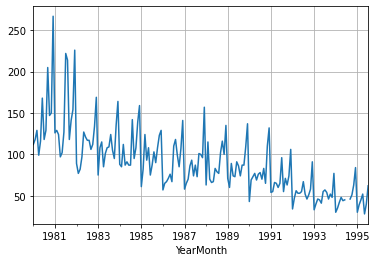

In [137]:
df_1.plot();
plt.grid()

#### Method 2 :

In [138]:
df_2 = pd.read_csv("Rose.csv")

In [139]:
df_2.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [140]:
df_2.tail()

,YearMonth,Rose
182,1995-03,45.0
183,1995-04,52.0
184,1995-05,28.0
185,1995-06,40.0
186,1995-07,62.0


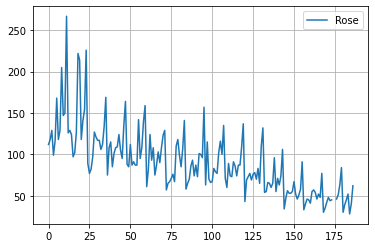

In [141]:
df_2.plot();
plt.grid()

In [142]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')

In [143]:
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [144]:
df_2['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df_2.head()

,YearMonth,Rose,Time_Stamp
0,1980-01,112.0,1980-01-31
1,1980-02,118.0,1980-02-29
2,1980-03,129.0,1980-03-31
3,1980-04,99.0,1980-04-30
4,1980-05,116.0,1980-05-31


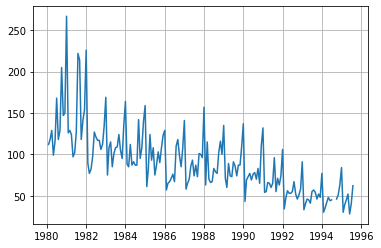

In [145]:
plt.plot(df_2['Time_Stamp'],df_2['Rose']);
plt.grid()

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [146]:
df_1.describe()

count    185.000000
mean      90.394595
std       39.175344
min       28.000000
25%       63.000000
50%       86.000000
75%      112.000000
max      267.000000
Name: Rose, dtype: float64

In [147]:
df_2.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


/Users/damini/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


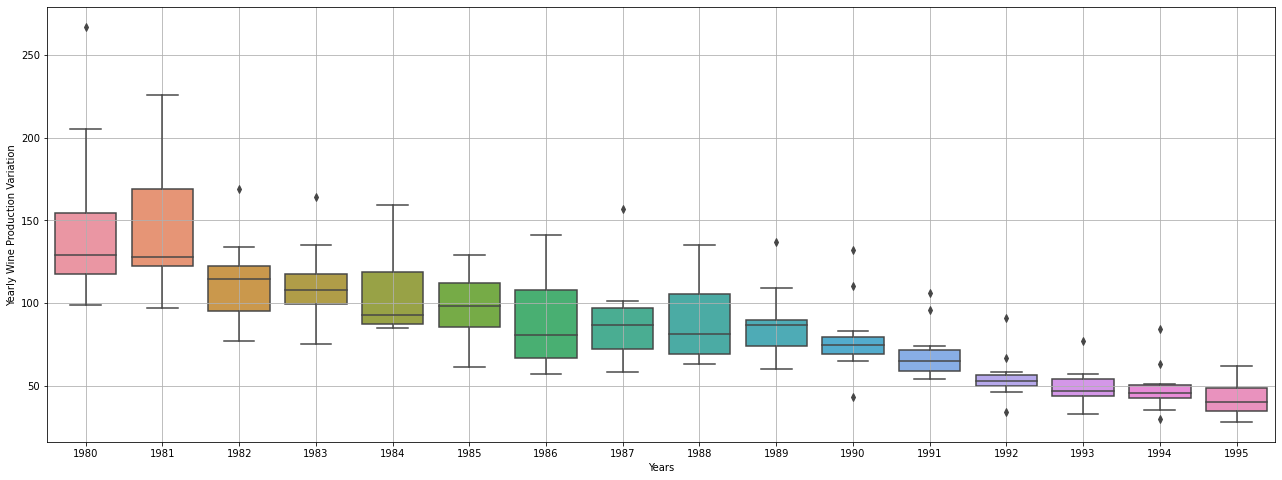

In [148]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df_1.index.year, df_1, ax=ax,whis=1.5)
plt.grid();
plt.xlabel('Years');
plt.ylabel('Yearly Wine Production Variation');

/Users/damini/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


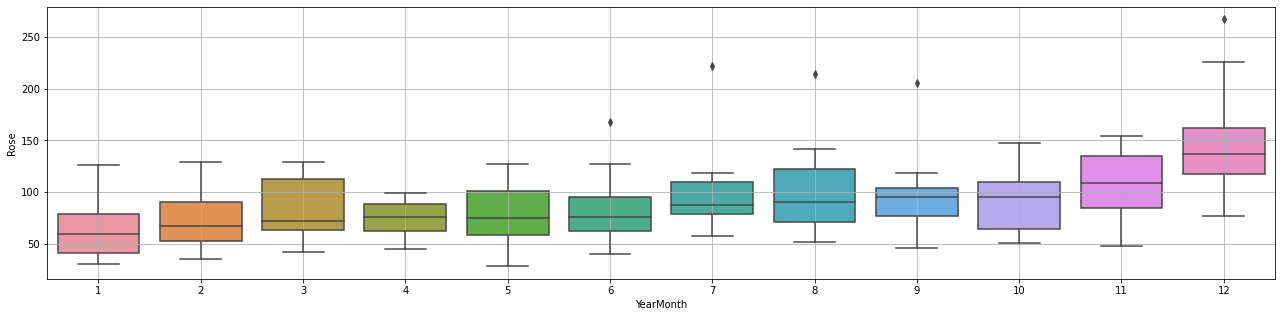

In [149]:
fig, ax = plt.subplots(figsize=(22,5))
sns.boxplot(df_1.index.month, df_1, ax=ax,whis=1.5)
plt.grid();

/Users/damini/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/damini/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


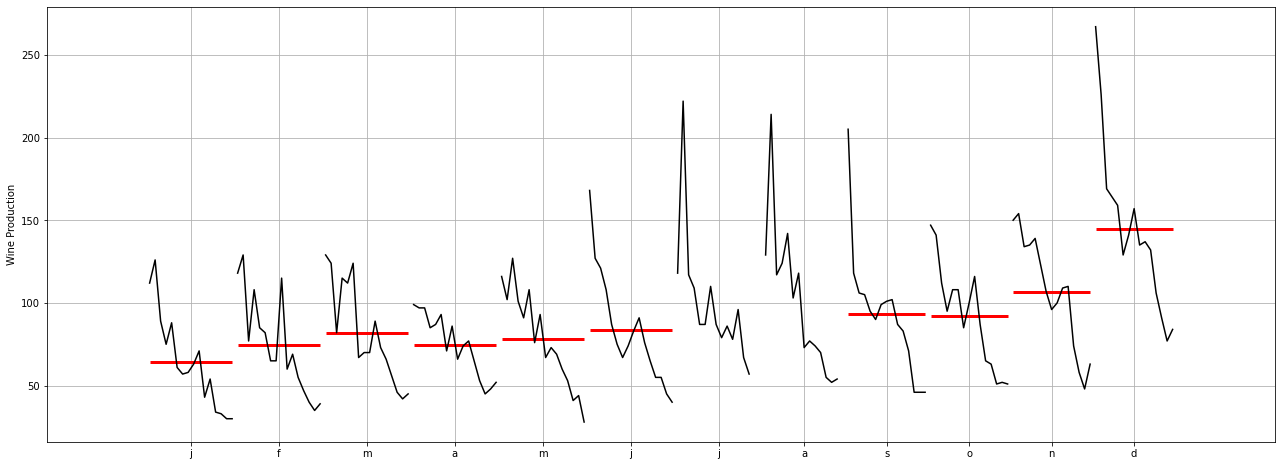

In [150]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(22,8))

month_plot(df_1,ylabel='Wine Production',ax=ax)
plt.grid();

In [151]:
df_2.set_index(keys = 'Time_Stamp',drop=True,inplace=True)
df_2.head()

,YearMonth,Rose
Time_Stamp,,
1980-01-31,1980-01,112.0
1980-02-29,1980-02,118.0
1980-03-31,1980-03,129.0
1980-04-30,1980-04,99.0
1980-05-31,1980-05,116.0


In [152]:
df_2.drop(labels='YearMonth',inplace=True,axis=1)
df_2.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [21]:
df_2['Rose']

Time_Stamp
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
              ...  
1995-03-31     45.0
1995-04-30     52.0
1995-05-31     28.0
1995-06-30     40.0
1995-07-31     62.0
Name: Rose, Length: 187, dtype: float64

In [153]:
yearly_sales_across_months = pd.pivot_table(df_2, values = 'Rose', columns = df_2.index.month, 
                                        index = df_2.index.year)

yearly_sales_across_months

Time_Stamp,1,2,3,4,5,6,7,8,9,10,11,12
Time_Stamp,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


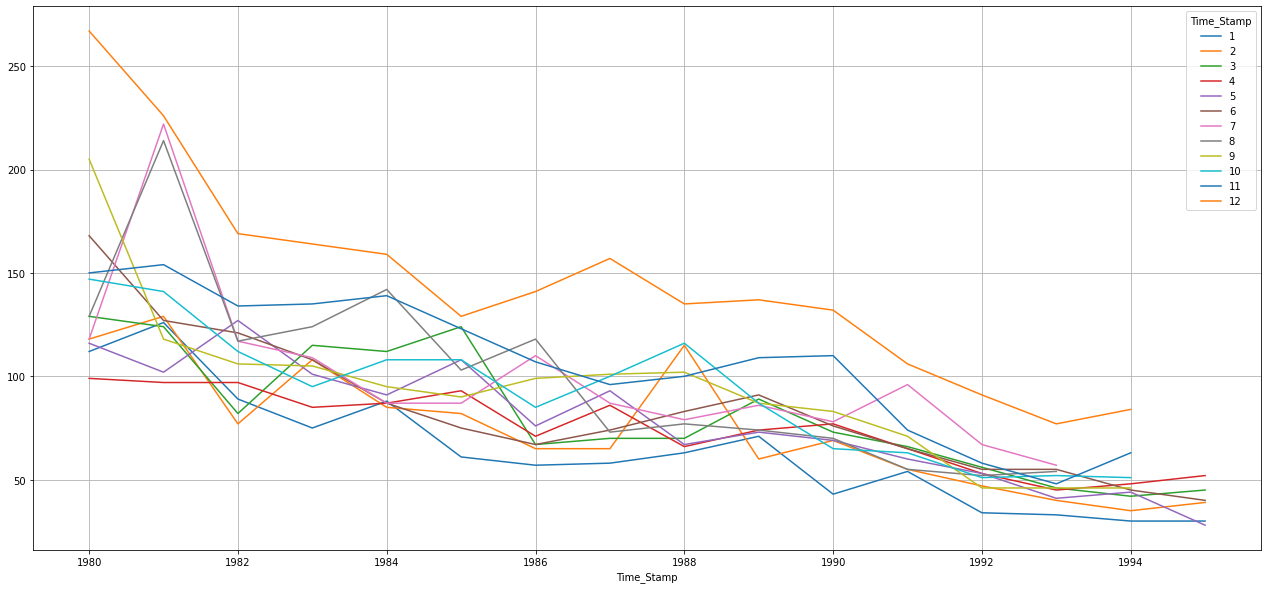

In [154]:
fig, ax = plt.subplots(figsize=(22,10))
yearly_sales_across_months.plot(ax=ax)
plt.grid();

#### Yearly Plot

In [155]:
df_yearly_sum = df_1.resample('A').sum()
df_yearly_sum.head()

YearMonth
1980-12-31    1758.0
1981-12-31    1780.0
1982-12-31    1348.0
1983-12-31    1324.0
1984-12-31    1280.0
Freq: A-DEC, Name: Rose, dtype: float64

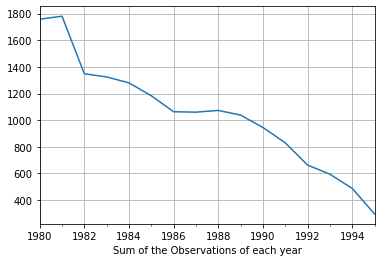

In [156]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [157]:
df_yearly_mean = df_1.resample('Y').mean()
df_yearly_mean.head()

YearMonth
1980-12-31    146.500000
1981-12-31    148.333333
1982-12-31    112.333333
1983-12-31    110.333333
1984-12-31    106.666667
Freq: A-DEC, Name: Rose, dtype: float64

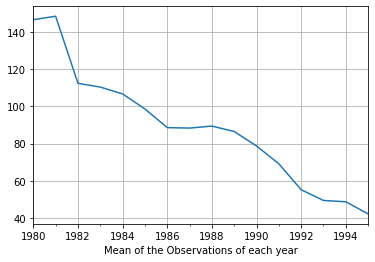

In [158]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

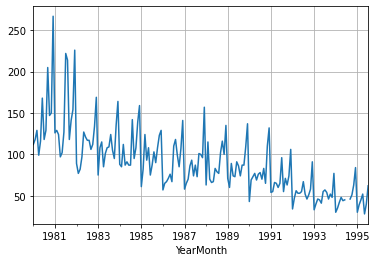

In [159]:
df_1.plot()
plt.grid();

#### Quarterly Plot

In [160]:
df_quarterly_sum = df_1.resample('Q').sum()
df_quarterly_sum.head()

YearMonth
1980-03-31    359.0
1980-06-30    383.0
1980-09-30    452.0
1980-12-31    564.0
1981-03-31    379.0
Freq: Q-DEC, Name: Rose, dtype: float64

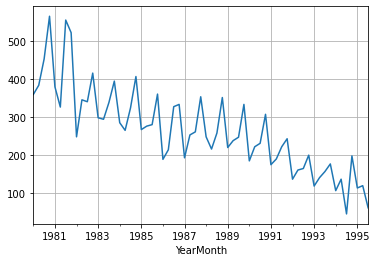

In [161]:
df_quarterly_sum.plot();
plt.grid()

In [162]:
df_quarterly_mean = df_1.resample('Q').mean()
df_quarterly_mean.head()

YearMonth
1980-03-31    119.666667
1980-06-30    127.666667
1980-09-30    150.666667
1980-12-31    188.000000
1981-03-31    126.333333
Freq: Q-DEC, Name: Rose, dtype: float64

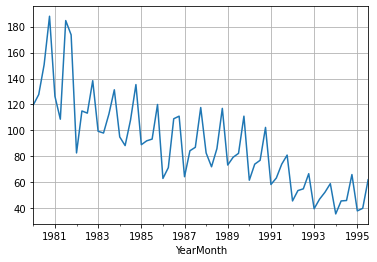

In [163]:
df_quarterly_mean.plot();
plt.grid()

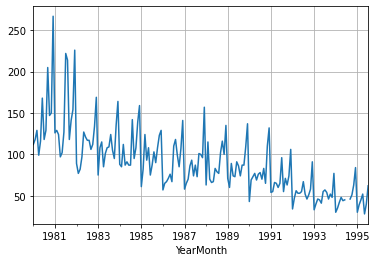

In [164]:
df_1.plot()
plt.grid();

#### Daily Plot

In [165]:
df_daily_sum = df_1.resample('D').sum()
df_daily_sum

YearMonth
1980-01-01    112.0
1980-01-02      0.0
1980-01-03      0.0
1980-01-04      0.0
1980-01-05      0.0
              ...  
1995-06-27      0.0
1995-06-28      0.0
1995-06-29      0.0
1995-06-30      0.0
1995-07-01     62.0
Freq: D, Name: Rose, Length: 5661, dtype: float64

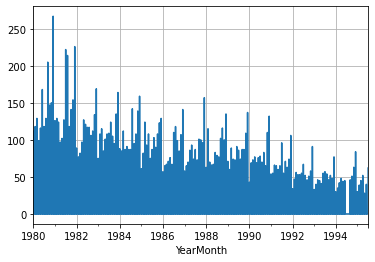

In [166]:
df_daily_sum.plot()
plt.grid();

#### Decade Plot

In [167]:
df_decade_sum = df_1.resample('10Y').sum()
df_decade_sum

YearMonth
1980-12-31     1758.0
1990-12-31    12094.0
2000-12-31     2871.0
Freq: 10A-DEC, Name: Rose, dtype: float64

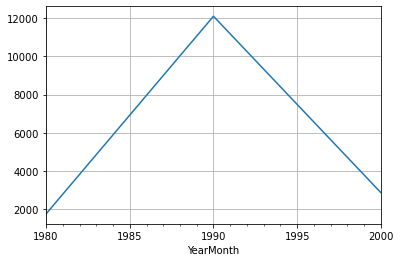

In [168]:
df_decade_sum.plot();
plt.grid()

In [169]:
df_1.describe()

count    185.000000
mean      90.394595
std       39.175344
min       28.000000
25%       63.000000
50%       86.000000
75%      112.000000
max      267.000000
Name: Rose, dtype: float64

In [170]:
df_1.isnull().sum()

2

In [171]:
df_1.isnull().any()

True

In [172]:
df_2.interpolate()['1995'].tail()

/var/folders/yp/t89g06p90zx8vx0b7r1w0ycc0000gn/T/ipykernel_34571/881373167.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2.interpolate()['1995'].tail()


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


In [173]:
df_2.interpolate()['1994'].tail()

/var/folders/yp/t89g06p90zx8vx0b7r1w0ycc0000gn/T/ipykernel_34571/1588805838.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2.interpolate()['1994'].tail()


,Rose
Time_Stamp,
1994-08-31,45.666667
1994-09-30,46.000000
1994-10-31,51.000000
1994-11-30,63.000000
1994-12-31,84.000000


In [174]:
df_2.isnull().sum()

Rose    2
dtype: int64

#### Decompose the Time Series

##### Additive Model

In [177]:
from statsmodels.tsa.seasonal import seasonal_decompose

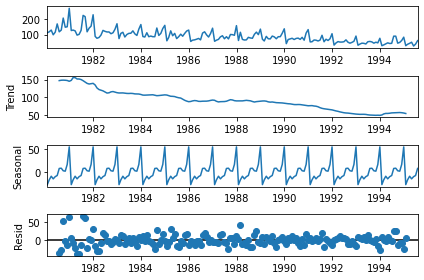

In [178]:
decomposition = seasonal_decompose(df_2,model='additive')
decomposition.plot();

In [179]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -28.403723
1980-02-29   -17.833219
1980-03-31    -9.816537
1980-04-30   -15.629037
1980-05-31   -10.727251
1980-06-30    -8.209394
1980-07-31     7.405916
1980-08-31     7.986472
1980-09-30     2.279610
1980-10-31     1.376832
1980-11-30    16.351832
1980-12-31    55.218499
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -36.489250
1980-08-31   -27.111472
1980-09-30    54.345390
1980-10-31    -2.460165
1980-11-30   -13.768499
1980-12-31    66.65

In [180]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    110.594084
1980-08-31    121.013528
1980-09-30    202.720390
1980-10-31    145.623168
1980-11-30    133.648168
1980-12-31    211.781501
dtype: float64

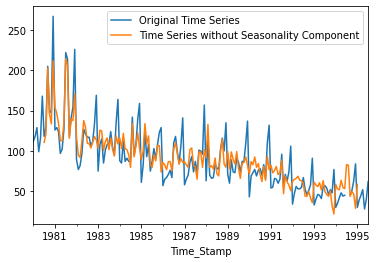

In [181]:
df_1.plot()
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

### 3. Split the data into training and test. The test data should start in 1991.

In [182]:
train    =   df_2[0:int(len(df_2)*0.71)] 
test     =   df_2[int(len(df_2)*0.71):]

In [183]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [184]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0 

Last few rows of Training Data 
              Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0 

First few rows of Test Data 
             Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0 

Last few rows of Test Data 
             Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0 



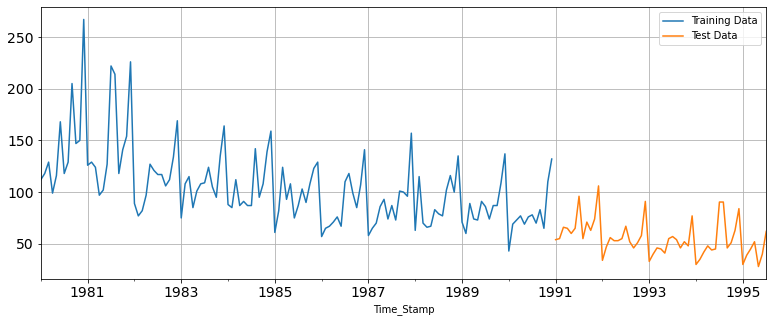

In [185]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

#### Model 1: Linear Regression

In [186]:
train_time = [i+1 for i in range(len(train))]

print('Training Time instance','\n',train_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


In [187]:
test_time = [i+133 for i in range(len(test))]

print('Test Time instance','\n',test_time)

Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [188]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [189]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [190]:
from sklearn.linear_model import LinearRegression

In [191]:
lr = LinearRegression()

In [192]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [193]:
test_predictions_model1 = lr.predict(LinearRegression_test[['time']])

In [194]:
LinearRegression_test['RegOnTime'] = test_predictions_model1

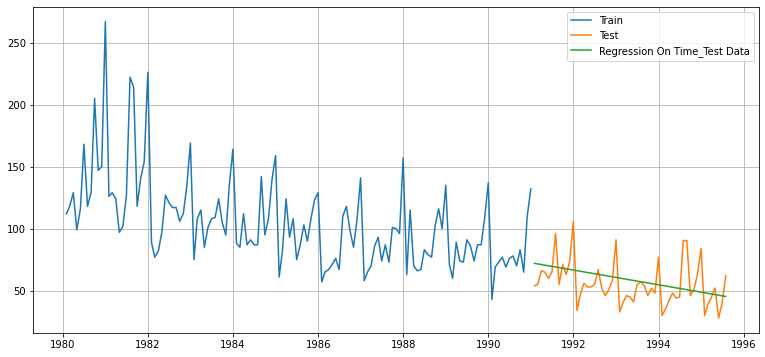

In [195]:

plt.figure(figsize=(13,6))
plt.plot( train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

In [52]:
from sklearn import metrics

In [53]:
df_2.isnull().sum()

Rose    2
dtype: int64

In [175]:
df_2.fillna(df_2.mean(), inplace=True)

In [176]:
df_2.isnull().sum()

Rose    0
dtype: int64

#### Model Evaluation

In [196]:
## Test Data - RMSE

rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 16.979


In [197]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,16.979414


#### Model 2: Naive Approach: 

##### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.m

In [198]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [199]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64

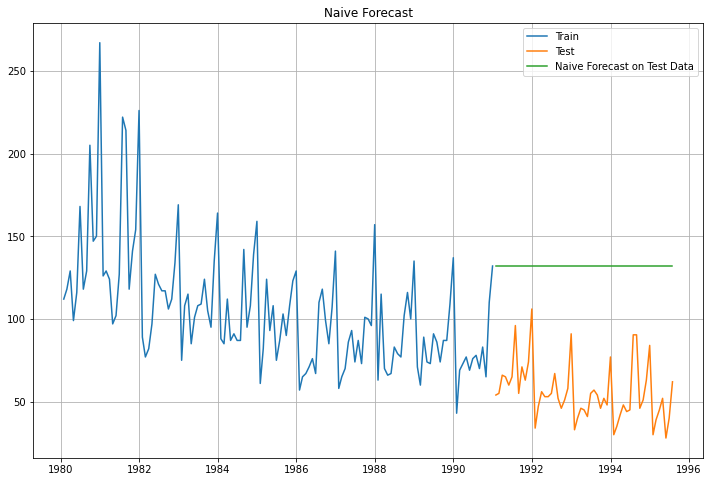

In [200]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

#### Model Evaluation

In [201]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 78.396


In [202]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,16.979414
NaiveModel,78.396083


### Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [203]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [204]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
Time_Stamp,,
1991-01-31,54.0,104.939394
1991-02-28,55.0,104.939394
1991-03-31,66.0,104.939394
1991-04-30,65.0,104.939394
1991-05-31,60.0,104.939394


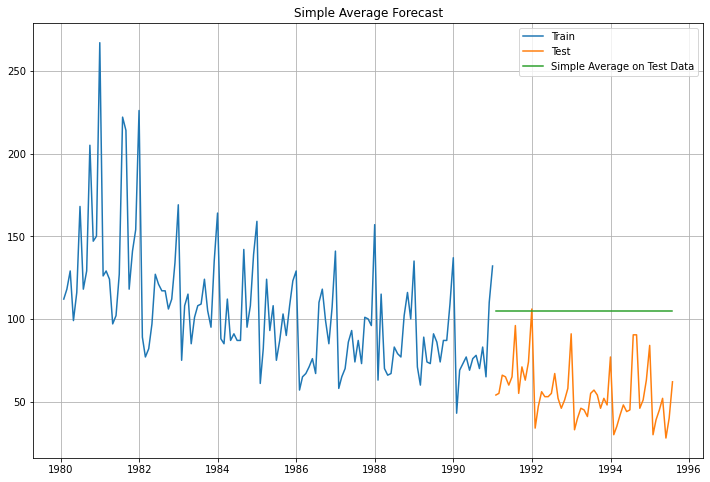

In [205]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

#### Model Evaluation :

In [206]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.319


In [207]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,16.979414
NaiveModel,78.396083
SimpleAverageModel,52.318735


### Method 4: Moving Average(MA)

##### For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. 

##### The best interval can be determined by the maximum accuracy (or the minimum error) over here.

##### For Moving Average, we are going to average over the entire data.

In [208]:
MovingAverage = df_2.copy()
MovingAverage.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


#### Trailing moving averages

In [209]:
MovingAverage['Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()

MovingAverage.head()

,Rose,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,112.0,NaN,NaN,NaN,NaN
1980-02-29,118.0,115.0,NaN,NaN,NaN
1980-03-31,129.0,123.5,NaN,NaN,NaN
1980-04-30,99.0,114.0,114.5,NaN,NaN
1980-05-31,116.0,107.5,115.5,NaN,NaN


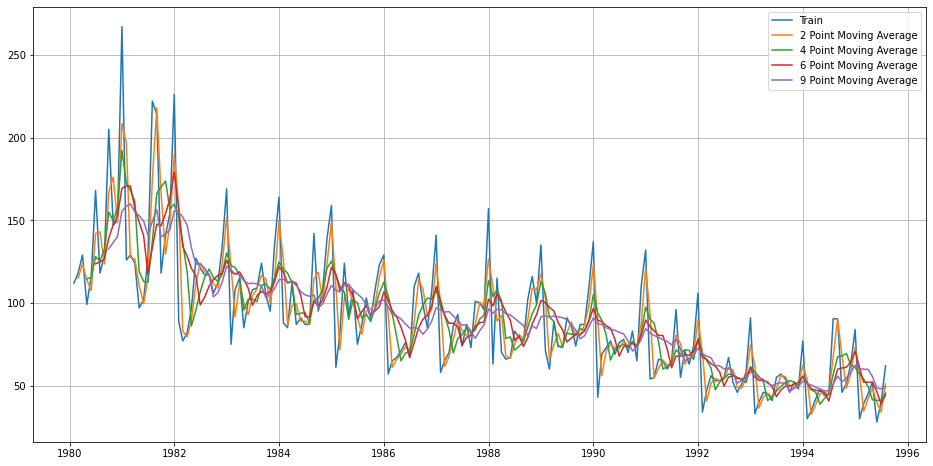

In [210]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Rose'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [211]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

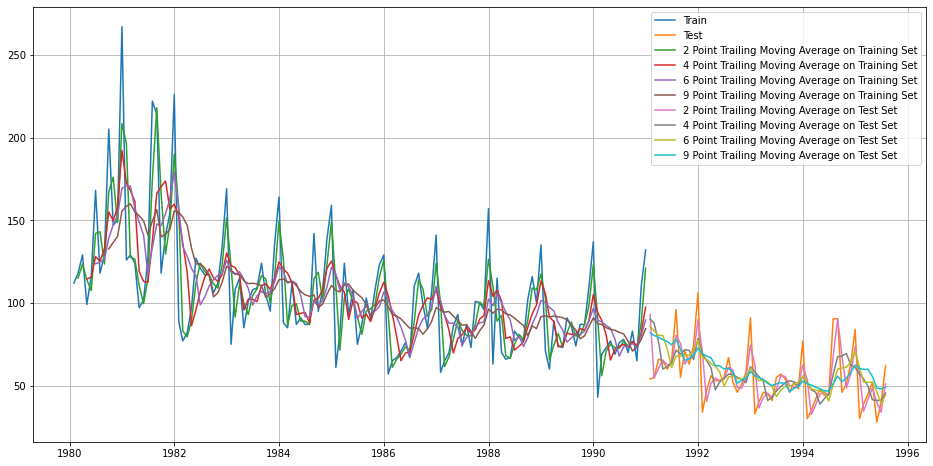

In [212]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

##### Model Evaluation

##### Done only on the test data.

In [213]:
## Test Data - RMSE --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE  --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE  --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 12.298
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 15.846
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 15.986
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 16.501 


In [214]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,16.979414
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823


#### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

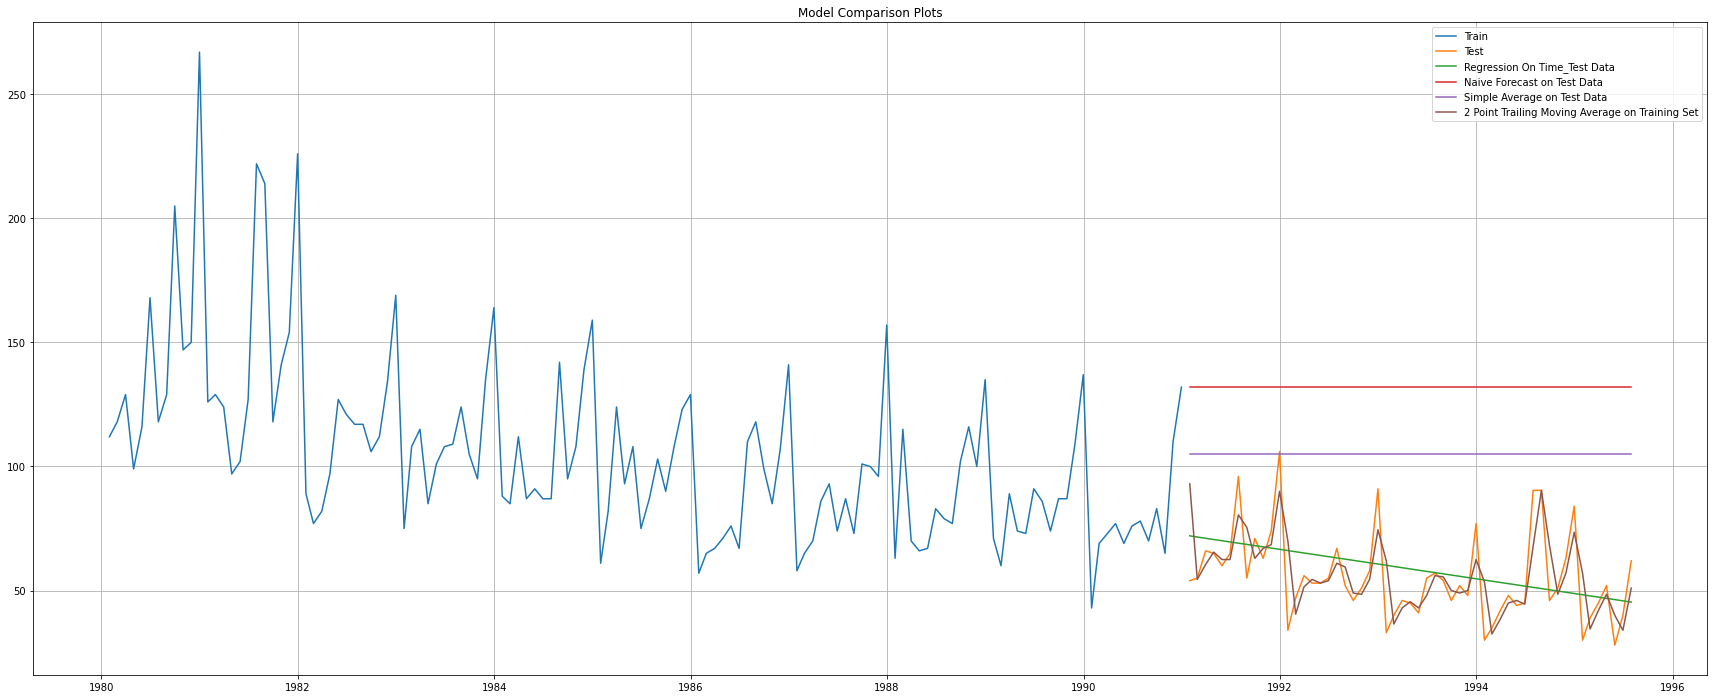

In [215]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### Method 5: Simple Exponential Smoothing

In [216]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [217]:
SES_train = train.copy()
SES_test = test.copy()

In [218]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

/Users/damini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/damini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [219]:
model_SES_autofit = model_SES.fit(optimized=True)

In [220]:
model_SES_autofit.params

{'smoothing_level': 0.09874989207824814,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.3869755697016,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [221]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

/Users/damini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


,Rose,predict
Time_Stamp,,
1991-01-31,54.0,87.104999
1991-02-28,55.0,87.104999
1991-03-31,66.0,87.104999
1991-04-30,65.0,87.104999
1991-05-31,60.0,87.104999


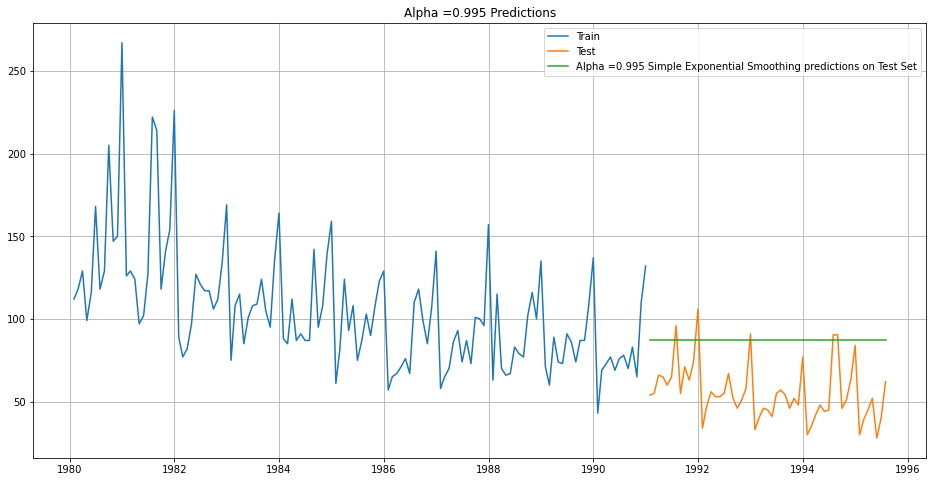

In [222]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

##### Model Evaluation for  𝛼
α
  = 0.995 : Simple Exponential Smoothing

In [223]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 35.936


In [224]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1]},index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE
RegressionOnTime,16.979414
NaiveModel,78.396083
SimpleAverageModel,52.318735
2pointTrailingMovingAverage,12.298291
4pointTrailingMovingAverage,15.845558
6pointTrailingMovingAverage,15.986163
9pointTrailingMovingAverage,16.500823
"Alpha=0.995,SimpleExponentialSmoothing",35.936212


### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [229]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

In [250]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

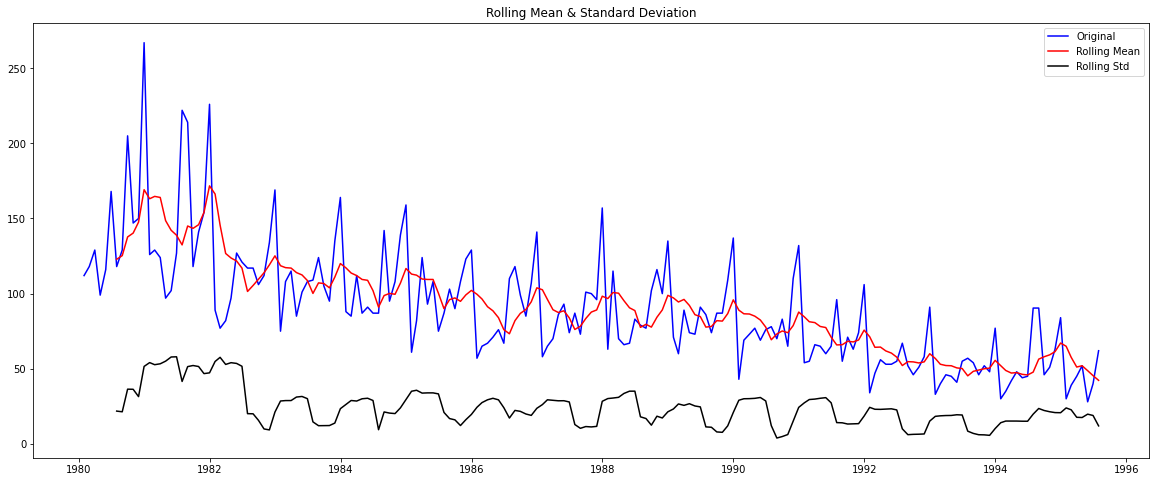

Results of Dickey-Fuller Test:
Test Statistic                  -1.933803
p-value                          0.316330
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [251]:
test_stationarity(df_2['Rose'])

 We see that at 5% significant level the Time Series is non-stationary.
 
 Let us take a difference of order 1 and check whether the Time Series is stationary or not.

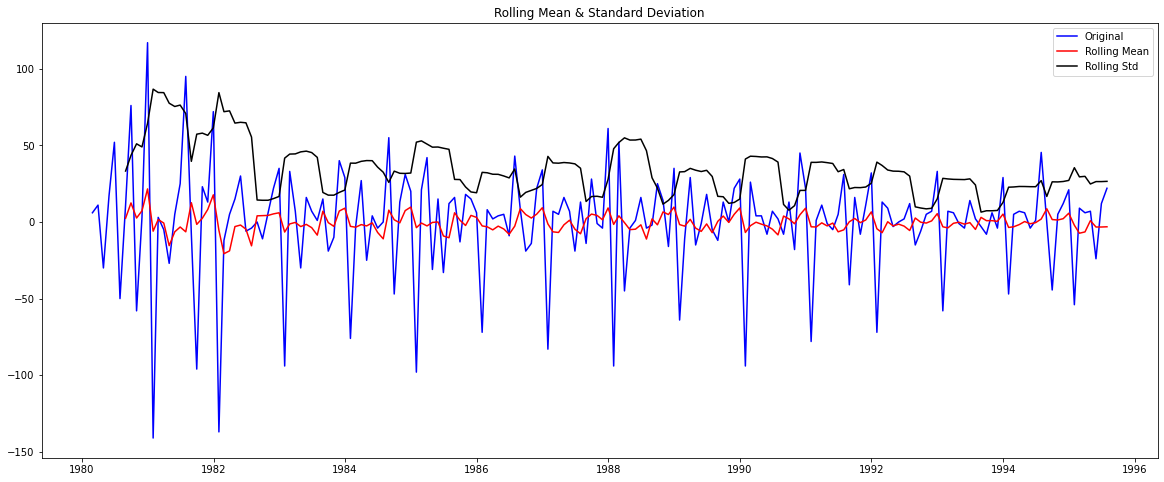

Results of Dickey-Fuller Test:
Test Statistic                -7.855944e+00
p-value                        5.442646e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [252]:
test_stationarity(df_2['Rose'].diff().dropna())

We see that at  𝛼
α
  = 0.05 the Time Series is indeed stationary.


In [233]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [234]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [236]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

/Users/damini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08074D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   5.081D+00
  F =   5.0807353370560211     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0) - AIC:1335.1526583086775
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           12

At X0         0 variables are exactly a


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.84648D+00    |proj g|=  1.45572D-04

At iterate   15    f=  4.84647D+00    |proj g|=  2.80664D-05

At iterate   20    f=  4.84647D+00    |proj g|=  6.75016D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     27      1     0     0   0.000D+00   4.846D+00
  F =   4.8464723273856603     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1) - AIC:1277.775749775043
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.84213

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   15    f=  4.83726D+00    |proj g|=  2.74714D-04

At iterate   20    f=  4.83725D+00    |proj g|=  1.83498D-04

At iterate   25    f=  4.83725D+00    |proj g|=  8.72191D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     29     45      1     0     0   8.882D-07   4.837D+00
  F =   4.8372489453184011     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 2) - AIC:1277.3592236734212
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.9336

 This problem is unconstrained.
 This problem is unconstrained.


ARIMA(2, 1, 0) - AIC:1300.6092611743966
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.84599D+00    |proj g|=  6.23981D-02

At iterate    5    f=  4.84369D+00    |proj g|=  3.10862D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   8.882D-08   4.844D+00
  F =   4.8436858374401330     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 1) - AIC:1279.045689409315
RUNNING THE L-BFGS-B CODE

           * * *

Machine 

 This problem is unconstrained.



At iterate   15    f=  4.83702D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     26      1     0     0   1.776D-07   4.837D+00
  F =   4.8370179157881923     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(2, 1, 2) - AIC:1279.2986939365064


In [237]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835373
5,"(1, 1, 2)",1277.359224
4,"(1, 1, 1)",1277.775750
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [238]:
auto_ARIMA = ARIMA(train['Rose'], order=(2,1,1),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.84599D+00    |proj g|=  6.23981D-02

At iterate    5    f=  4.84369D+00    |proj g|=  3.10862D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     13      1     0     0   8.882D-08   4.844D+00
  F =   4.8436858374401330     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observati

/Users/damini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


In [239]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [240]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

17.13919294217734


In [241]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf

,RMSE
"ARIMA(2,1,1)",17.139193


In [242]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

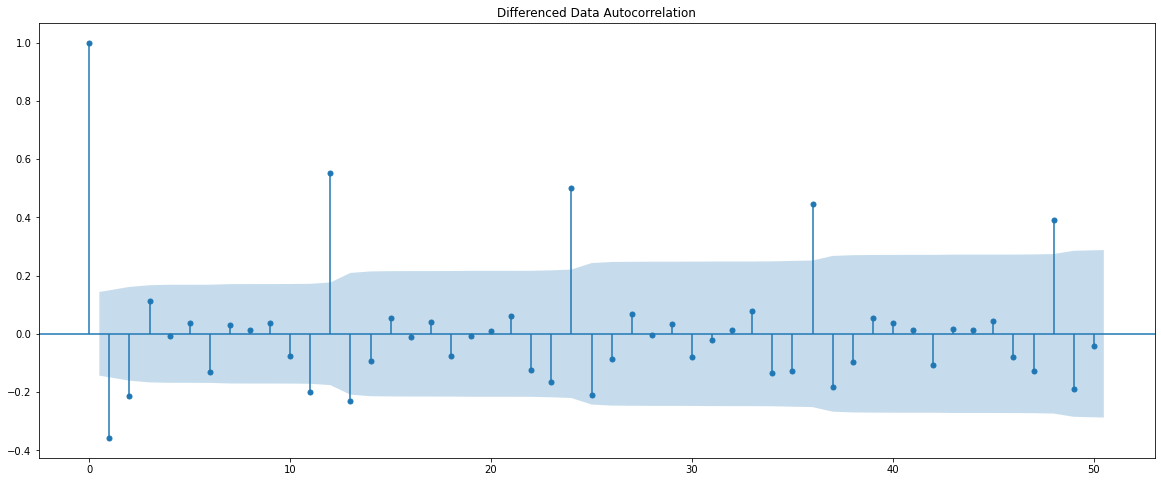

In [253]:
plot_acf(df_2['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

We see that there can be a seasonality of 12.

In [244]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [245]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [246]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.00750D+00    |proj g|=  3.85985D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   1.652D-07   5.007D+00
  F =   5.0074461648784689     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variable

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  3.67618D+00    |proj g|=  1.48313D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     21      1     0     0   6.291D-06   3.676D+00
  F =   3.6758997334776113     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380894
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.30273D+00    |proj g|=  8.59792D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.20661D+00    |proj g|=  1.67728D-03

At iterate   15    f=  4.20609D+00    |proj g|=  2.39395D-02

At iterate   20    f=  4.20463D+00    |proj g|=  4.47283D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     23     31      1     0     0   3.786D-05   4.205D+00
  F =   4.2046241929492432     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386002


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66439D+00    |proj g|=  4.15199D-01

At iterate    5    f=  3.64280D+00    |proj g|=  1.19867D-02

At iterate   10    f=  3.64277D+00    |proj g|=  1.40674D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   6.232D-05   3.643D+00
  F =   3.6427703165724310     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635751217
RUNNING THE L-BF

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/damini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63243D+00    |proj g|=  1.97743D-01

At iterate    5    f=  3.61727D+00    |proj g|=  2.52418D-03

At iterate   10    f=  3.61708D+00    |proj g|=  1.49043D-02


 This problem is unconstrained.



At iterate   15    f=  3.61697D+00    |proj g|=  2.66064D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     18      1     0     0   1.826D-05   3.617D+00
  F =   3.6169676290521009     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697546
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.58992D+00    |proj g|=  1.16506D-01

At iterate    5    f=  3.58185D+00    |proj g|=  3.88612D-03


 This problem is unconstrained.



At iterate   10    f=  3.58182D+00    |proj g|=  3.70027D-03

At iterate   15    f=  3.58172D+00    |proj g|=  4.53054D-03

At iterate   20    f=  3.58172D+00    |proj g|=  1.21897D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.219D-05   3.582D+00
  F =   3.5817179579339595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.5735408945653
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.24373D+00    |proj g|=  9.60725D-02

At iterate    5    f=  4.20939D+00    |proj g|=  1.18292D-02

At iterate   10    f=  4.18676D+00    |proj g|=  1.41626D-01

At iterate   15    f=  4.13847D+00    |proj g|=  2.03839D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     23      1     0     0   1.554D-06   4.138D+00
  F =   4.1384677370902780     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918334
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71952D+00    |proj g|=  1.01503D-01

At iterate    5    f=  3.68220D+00    |proj g|=  1.65259D-02


 This problem is unconstrained.



At iterate   10    f=  3.52809D+00    |proj g|=  8.13750D-01

At iterate   15    f=  3.46833D+00    |proj g|=  2.15977D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     28      1     0     0   1.159D-05   3.468D+00
  F =   3.4683007762817688     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383869
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.26445D+00    |proj g|=  9.77384D-02

At iterate    5

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     27      1     0     0   1.225D-06   4.128D+00
  F =   4.1280061836811708     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918292
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.17293D+00    |proj g|=  1.02984D-01

At iterate    5    f=  4.14093D+00    |proj g|=  3.01680D-02


 This problem is unconstrained.



At iterate   10    f=  4.12122D+00    |proj g|=  1.80744D-01

At iterate   15    f=  3.99019D+00    |proj g|=  1.22205D-01

At iterate   20    f=  3.96668D+00    |proj g|=  2.52243D-02

At iterate   25    f=  3.96494D+00    |proj g|=  2.44765D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     48      1     0     0   2.554D-05   3.965D+00
  F =   3.9649372465703401     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330945698
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.70606D+00    |proj g|=  1.16728D-01

At iterate    5    f=  3.66794D+00    |proj g|=  1.64727D-02

At iterate   10    f=  3.64073D+00    |proj g|=  5.56530D-02

At iterate   1

 This problem is unconstrained.



At iterate   10    f=  3.46626D+00    |proj g|=  3.19886D-01

At iterate   15    f=  3.43448D+00    |proj g|=  5.05298D-02

At iterate   20    f=  3.43408D+00    |proj g|=  7.99134D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     33      1     0     0   7.991D-06   3.434D+00
  F =   3.4340844191424633     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536103
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.71583D+00    |proj g|=  6.76122D-02

At iterate   10    f=  3.67889D+00    |proj g|=  2.61238D-01

At iterate   15    f=  3.43852D+00    |proj g|=  1.26595D-01

At iterate   20    f=  3.42934D+00    |proj g|=  1.91670D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     34      1     0     0   5.392D-06   3.429D+00
  F =   3.4292925872960889     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461675
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate   15    f=  3.52131D+00    |proj g|=  7.58246D-02

At iterate   20    f=  3.43576D+00    |proj g|=  4.94197D-01

At iterate   25    f=  3.37650D+00    |proj g|=  6.08812D-02

At iterate   30    f=  3.37301D+00    |proj g|=  9.06681D-03

At iterate   35    f=  3.36953D+00    |proj g|=  3.82555D-02

At iterate   40    f=  3.36872D+00    |proj g|=  3.81047D-02

At iterate   45    f=  3.36832D+00    |proj g|=  4.14087D-03

At iterate   50    f=  3.36820D+00    |proj g|=  1.23656D-03

At iterate   55    f=  3.36818D+00    |proj g|=  7.63171D-04

At iterate   60    f=  3.36818D+00    |proj g|=  6.31709D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.13728D+00    |proj g|=  1.18512D-02

At iterate   10    f=  4.12216D+00    |proj g|=  1.42571D-01

At iterate   15    f=  4.07443D+00    |proj g|=  3.76208D-02

At iterate   20    f=  4.07381D+00    |proj g|=  6.22240D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     27      1     0     0   6.222D-06   4.074D+00
  F =   4.0738132482063838     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1083.4866975264854
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate    5    f=  3.61768D+00    |proj g|=  6.17181D-02

At iterate   10    f=  3.60247D+00    |proj g|=  9.99630D-02

At iterate   15    f=  3.42440D+00    |proj g|=  5.15437D-02

At iterate   20    f=  3.42233D+00    |proj g|=  3.22722D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     28      1     0     0   2.091D-06   3.422D+00
  F =   3.4223251843248899     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:913.4938486617709
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  4.17278D+00    |proj g|=  1.58683D-01

At iterate   15    f=  4.09623D+00    |proj g|=  1.00393D-01

At iterate   20    f=  4.09407D+00    |proj g|=  3.06991D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     28      1     0     0   1.364D-05   4.094D+00
  F =   4.0940654709901709     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1088.833284341405
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  4.07383D+00    |proj g|=  2.09225D-02

At iterate   10    f=  4.05413D+00    |proj g|=  1.08602D-01

At iterate   15    f=  3.92562D+00    |proj g|=  2.57908D-02

At iterate   20    f=  3.92274D+00    |proj g|=  9.70754D-04

At iterate   25    f=  3.92253D+00    |proj g|=  1.37605D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     38      1     0     0   6.740D-05   3.923D+00
  F =   3.9225003536283189     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1045.5400933578762
RUNNING THE L-BFGS-B CODE

           * * *

Machine preci

 This problem is unconstrained.



At iterate    5    f=  3.59567D+00    |proj g|=  1.70714D-02

At iterate   10    f=  3.58784D+00    |proj g|=  1.99114D-02

At iterate   15    f=  3.50486D+00    |proj g|=  2.08492D-01

At iterate   20    f=  3.39380D+00    |proj g|=  1.08431D-01

At iterate   25    f=  3.38194D+00    |proj g|=  5.13633D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     34      1     0     0   8.105D-05   3.382D+00
  F =   3.3819359521143264     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:904.8310913581822
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.



At iterate   10    f=  3.47907D+00    |proj g|=  2.92573D-01

At iterate   15    f=  3.42067D+00    |proj g|=  2.14188D-02

At iterate   20    f=  3.42049D+00    |proj g|=  1.56923D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     29      1     0     0   1.569D-06   3.420D+00
  F =   3.4204946637340701     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:913.0105912257945
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f=  3.62995D+00    |proj g|=  1.99001D-01

At iterate   15    f=  3.48363D+00    |proj g|=  9.32648D-02

At iterate   20    f=  3.42378D+00    |proj g|=  1.52611D-01

At iterate   25    f=  3.41731D+00    |proj g|=  1.36051D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     35      1     0     0   2.445D-05   3.417D+00
  F =   3.4173134640282856     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:914.1707545034674
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.57509D+00    |proj g|=  1.81151D-02

At iterate   10    f=  3.55771D+00    |proj g|=  4.60310D-02

At iterate   15    f=  3.38907D+00    |proj g|=  2.56645D-01

At iterate   20    f=  3.31168D+00    |proj g|=  6.30381D-02

At iterate   25    f=  3.31037D+00    |proj g|=  5.69011D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     27     34      1     0     0   2.342D-05   3.310D+00
  F =   3.3103693506362397     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:887.9375085679673
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  4.27763D+00    |proj g|=  8.30541D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   1.239D-06   4.278D+00
  F =   4.2776346392370073     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1135.2955447585698
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.80258D+00    |proj g|=  1.04850D-01

At iterate    5    f=  3.77292D+00    |proj g|=  8.11557D-02

At iterate   10

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.23821D+00    |proj g|=  1.74289D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     15      1     0     0   2.465D-06   4.238D+00
  F =   4.2382048434865833     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1124.886078680458
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.27686D+00    |proj g|=  9.25487D-02

At iterate    5    f=  4.26877D+00    |proj g|=  1.27473D-02

At iterate   10

 This problem is unconstrained.



At iterate   10    f=  3.68476D+00    |proj g|=  1.91002D-01

At iterate   15    f=  3.59281D+00    |proj g|=  4.46720D-03

At iterate   20    f=  3.59280D+00    |proj g|=  1.23737D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     23      1     0     0   1.237D-06   3.593D+00
  F =   3.5928037776318913     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:958.5001972948193
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.72088D+00    |proj g|=  1.23244D-01

At iterate   10    f=  3.52907D+00    |proj g|=  1.62723D-02

At iterate   15    f=  3.52689D+00    |proj g|=  2.56641D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     19      1     0     0   8.074D-06   3.527D+00
  F =   3.5268881737364088     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:939.0984778664119
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.73507D+00    |proj g|=  2.17917D-02

At iterate   10    f=  3.55629D+00    |proj g|=  2.18635D-01

At iterate   15    f=  3.52621D+00    |proj g|=  6.80091D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23      1     0     0   9.273D-06   3.526D+00
  F =   3.5261693688110096     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:940.9087133661066
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f=  3.67792D+00    |proj g|=  2.08147D-01

At iterate   15    f=  3.52599D+00    |proj g|=  2.64536D-02

At iterate   20    f=  3.52385D+00    |proj g|=  1.99516D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     23      1     0     0   2.988D-05   3.524D+00
  F =   3.5238534481330785     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:942.2973103071328
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   15    f=  4.75911D+00    |proj g|=  1.03025D-01

At iterate   20    f=  4.75827D+00    |proj g|=  7.19869D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     20     24      1     0     0   7.199D-07   4.758D+00
  F =   4.7582727516119343     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1262.1840064255507
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.21922D+00    |proj g|=  1.38047D-01

At iterate    5

 This problem is unconstrained.



At iterate   10    f=  3.64967D+00    |proj g|=  8.48310D-02

At iterate   15    f=  3.46782D+00    |proj g|=  7.54151D-02

At iterate   20    f=  3.45866D+00    |proj g|=  1.20865D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   9.466D-06   3.459D+00
  F =   3.4586599333575290     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:923.0862224063876
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   15    f=  4.08297D+00    |proj g|=  1.54258D-01

At iterate   20    f=  4.07346D+00    |proj g|=  9.52738D-05
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1083.3937965032806
           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     28      1     0     0   1.405D-05   4.073D+00
  F =   4.0734613503912138     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.15321D+00    |proj g|=  1.15193D-01

At iterate    

 This problem is unconstrained.



At iterate   10    f=  4.10738D+00    |proj g|=  1.15626D-01

At iterate   15    f=  3.96194D+00    |proj g|=  1.44874D-01

At iterate   20    f=  3.95728D+00    |proj g|=  2.36801D-03

At iterate   25    f=  3.95727D+00    |proj g|=  1.67485D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     34      1     0     0   1.675D-05   3.957D+00
  F =   3.9572653587638471     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1054.7180547136556
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  3.58549D+00    |proj g|=  1.36094D-01

At iterate   15    f=  3.42854D+00    |proj g|=  5.35341D-02

At iterate   20    f=  3.42564D+00    |proj g|=  1.30571D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     27      1     0     0   5.105D-05   3.426D+00
  F =   3.4255869047369987     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:916.3549428505677
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate    5    f=  3.67220D+00    |proj g|=  4.30510D-02

At iterate   10    f=  3.43777D+00    |proj g|=  1.88373D-01

At iterate   15    f=  3.39429D+00    |proj g|=  6.98583D-02

At iterate   20    f=  3.39365D+00    |proj g|=  1.91490D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     35      1     0     0   6.115D-06   3.394D+00
  F =   3.3936549472887099     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:905.9249060842194


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69196D+00    |proj g|=  6.07566D-02

At iterate    5    f=  3.67133D+00    |proj g|=  1.79669D-02

At iterate   10    f=  3.51896D+00    |proj g|=  4.77566D-01

At iterate   15    f=  3.39174D+00    |proj g|=  3.66167D-02

At iterate   20    f=  3.39128D+00    |proj g|=  3.00072D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     27      1     0     0   2.103D-05   3.391D+00
  F =   3.3912776013147079     

CONVERG

 This problem is unconstrained.



At iterate   10    f=  3.61820D+00    |proj g|=  5.04973D-02

At iterate   15    f=  3.42463D+00    |proj g|=  8.01995D-02

At iterate   20    f=  3.35867D+00    |proj g|=  7.79007D-03

At iterate   25    f=  3.35861D+00    |proj g|=  7.83326D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     35      1     0     0   1.355D-06   3.359D+00
  F =   3.3586082560367085     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:900.672579593691
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.71664D+00    |proj g|=  3.67193D-02

At iterate   10    f=  4.71351D+00    |proj g|=  2.34626D-03

At iterate   15    f=  4.71275D+00    |proj g|=  2.29530D-02

At iterate   20    f=  4.71193D+00    |proj g|=  1.13398D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   1.557D-05   4.712D+00
  F =   4.7119299396614522     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1251.9495040706233
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0

 This problem is unconstrained.



At iterate   10    f=  3.52058D+00    |proj g|=  2.77620D-01

At iterate   15    f=  3.49551D+00    |proj g|=  1.12962D-01

At iterate   20    f=  3.46754D+00    |proj g|=  2.29400D+00

At iterate   25    f=  3.43442D+00    |proj g|=  9.19905D-02

At iterate   30    f=  3.42250D+00    |proj g|=  6.39488D-03

At iterate   35    f=  3.42233D+00    |proj g|=  2.69909D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     39     53      1     0     0   2.141D-06   3.422D+00
  F =   3.4223251524312936     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:915.49384024186

 This problem is unconstrained.



At iterate   10    f=  4.13872D+00    |proj g|=  6.69344D-02

At iterate   15    f=  4.12693D+00    |proj g|=  4.00737D-02

At iterate   20    f=  4.10885D+00    |proj g|=  1.45808D+00

At iterate   25    f=  4.10048D+00    |proj g|=  1.40084D-01

At iterate   30    f=  4.09903D+00    |proj g|=  3.13170D-01

At iterate   35    f=  4.09410D+00    |proj g|=  5.24577D-02

At iterate   40    f=  4.09385D+00    |proj g|=  5.16697D-03

At iterate   45    f=  4.09385D+00    |proj g|=  1.52018D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     46     66      1     0     0   6.014D-05   4.094D+00
  F =   4.09384883561

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.07876D+00    |proj g|=  8.54588D-02

At iterate    5    f=  4.05909D+00    |proj g|=  1.66873D-02

At iterate   10    f=  4.02760D+00    |proj g|=  1.62368D-01

At iterate   15    f=  4.00752D+00    |proj g|=  1.18066D-01

At iterate   20    f=  3.99829D+00    |proj g|=  1.51146D-01

At iterate   25    f=  3.95501D+00    |proj g|=  3.86316D-01

At iterate   30    f=  3.94059D+00    |proj g|=  8.98421D-02

At iterate   35    f=  3.91828D+00    |proj g|=  1.32967D-01

At iterate   40    f=  3.90415D+00    |proj g|=  1.29137D-02

At iterate   45    f=  3.90386D+00    |proj g|=  3.59543D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62235D+00    |proj g|=  1.25133D-01

At iterate    5    f=  3.58726D+00    |proj g|=  1.71022D-02

At iterate   10    f=  3.52802D+00    |proj g|=  1.87541D-01

At iterate   15    f=  3.44358D+00    |proj g|=  6.57968D-02

At iterate   20    f=  3.43206D+00    |proj g|=  1.79662D-01

At iterate   25    f=  3.42434D+00    |proj g|=  2.43646D-01

At iterate   30    f=  3.42148D+00    |proj g|=  1.21808D-01

At iterate   35    f=  3.41979D+00    |proj g|=  4.01961D-02

At iterate   40    f=  3.40233D+00    |proj g|=  1.90380D-01

At iterate   45    f=  3.38714D+00    |proj g|=  1.44605D-01

At iterate   50    f=  3.38157D+00    |proj g|=  5.90095D-03

At iterate   55    f=  3.38156D+00    |proj g|=  8.32075D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.



At iterate    5    f=  3.63418D+00    |proj g|=  3.39950D-02

At iterate   10    f=  3.55457D+00    |proj g|=  6.77404D-02

At iterate   15    f=  3.48275D+00    |proj g|=  1.56179D-01

At iterate   20    f=  3.48131D+00    |proj g|=  3.19693D-01

At iterate   25    f=  3.44295D+00    |proj g|=  2.43605D-01

At iterate   30    f=  3.40170D+00    |proj g|=  7.89284D-02

At iterate   35    f=  3.38869D+00    |proj g|=  6.16688D-02

At iterate   40    f=  3.38701D+00    |proj g|=  4.61921D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     72      1     0     0   3.305D-06   3.387D+00
  F =   3.38700386234

 This problem is unconstrained.



At iterate    5    f=  3.63581D+00    |proj g|=  1.83514D-02

At iterate   10    f=  3.57904D+00    |proj g|=  2.11261D-01

At iterate   15    f=  3.45331D+00    |proj g|=  1.55272D-01

At iterate   20    f=  3.42940D+00    |proj g|=  7.49875D-01

At iterate   25    f=  3.42855D+00    |proj g|=  7.35336D-02

At iterate   30    f=  3.42300D+00    |proj g|=  7.20313D-01

At iterate   35    f=  3.39580D+00    |proj g|=  1.39651D-01

At iterate   40    f=  3.38568D+00    |proj g|=  3.50980D-02

At iterate   45    f=  3.38433D+00    |proj g|=  4.29971D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     49     76   

 This problem is unconstrained.



At iterate    5    f=  3.56578D+00    |proj g|=  1.94295D-02

At iterate   10    f=  3.49004D+00    |proj g|=  1.27647D-01

At iterate   15    f=  3.41630D+00    |proj g|=  1.16817D-01

At iterate   20    f=  3.36881D+00    |proj g|=  2.63597D+00

At iterate   25    f=  3.36597D+00    |proj g|=  7.09413D-02

At iterate   30    f=  3.36283D+00    |proj g|=  9.65305D-01

At iterate   35    f=  3.36053D+00    |proj g|=  3.53933D-01

At iterate   40    f=  3.34900D+00    |proj g|=  7.61749D-01

At iterate   45    f=  3.34713D+00    |proj g|=  2.74959D-01

At iterate   50    f=  3.34648D+00    |proj g|=  2.95844D-01

At iterate   55    f=  3.33869D+00    |proj g|=  5.31351D-01

At iterate   60    f=  3.33602D+00    |proj g|=  2.84765D-01

At iterate   65    f=  3.33594D+00    |proj g|=  2.58506D-02

At iterate   70    f=  3.33594D+00    |proj g|=  4.36072D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.24579D+00    |proj g|=  1.58253D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   1.327D-04   4.245D+00
  F =   4.2453688275421930     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1128.777370471139
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75501D+00    |proj g|=  1.01527D-01

At iterate    5    f=  3.72757D+00    |proj g|=  5.50269D-02


 This problem is unconstrained.



At iterate   10    f=  3.59598D+00    |proj g|=  2.20123D-02

At iterate   15    f=  3.59121D+00    |proj g|=  1.80632D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   4.213D-06   3.591D+00
  F =   3.5912095487992270     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:958.079320882996
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.19667D+00    |proj g|=  8.62226D-02


 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.18623D+00    |proj g|=  4.48097D-02

At iterate   10    f=  4.13532D+00    |proj g|=  1.07523D-02

At iterate   15    f=  4.13450D+00    |proj g|=  2.90346D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   2.903D-07   4.135D+00
  F =   4.1345022808999659     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1099.508602157591
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.73982D+00    |proj g|=  1.28107D-01

At iterate    5    f=  3.70863D+00    |proj g|=  1.52043D-02

At iterate   10    f=  3.61511D+00    |proj g|=  2.30314D-01

At iterate   15    f=  3.55760D+00    |proj g|=  6.38275D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     23      1     0     0   1.251D-05   3.558D+00
  F =   3.5575712748329344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:951.1988165558947

 This problem is unconstrained.



At iterate   15    f=  3.46440D+00    |proj g|=  1.38774D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     21      1     0     0   8.754D-07   3.464D+00
  F =   3.4643957547899435     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:924.6004792645451
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.66923D+00    |proj g|=  1.06539D-01


 This problem is unconstrained.



At iterate    5    f=  3.64876D+00    |proj g|=  1.85650D-02

At iterate   10    f=  3.50157D+00    |proj g|=  2.23491D-01

At iterate   15    f=  3.46205D+00    |proj g|=  5.73072D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     22      1     0     0   4.179D-05   3.462D+00
  F =   3.4620294702214855     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:925.9757801384721
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.



At iterate   10    f=  3.56657D+00    |proj g|=  1.95054D-01

At iterate   15    f=  3.46303D+00    |proj g|=  5.26298D-02

At iterate   20    f=  3.46151D+00    |proj g|=  1.57554D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     22     28      1     0     0   1.318D-06   3.462D+00
  F =   3.4615078383639415     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:927.8380693280806
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.75867D+00    |proj g|=  4.80322D-02

At iterate   20    f=  4.75467D+00    |proj g|=  4.10071D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     23     34      1     0     0   7.218D-06   4.755D+00
  F =   4.7546648605314425     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1263.2315231803009
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.22629D+00    |proj g|=  9.92052D-02

At iterate    

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69900D+00    |proj g|=  1.03373D-01

At iterate    5    f=  3.66388D+00    |proj g|=  5.51283D-02

At iterate   10    f=  3.65229D+00    |proj g|=  3.38105D-02

At iterate   15    f=  3.51641D+00    |proj g|=  2.23303D-01

At iterate   20    f=  3.45077D+00    |proj g|=  4.85683D-02

At iterate   25    f=  3.45053D+00    |proj g|=  3.65868D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     28     45      1     0     0   

 This problem is unconstrained.



At iterate   10    f=  4.12165D+00    |proj g|=  7.37812D-02

At iterate   15    f=  4.02165D+00    |proj g|=  2.45614D-02

At iterate   20    f=  4.02055D+00    |proj g|=  2.96934D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     31      1     0     0   9.165D-06   4.021D+00
  F =   4.0205490913262514     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1071.4249601101303
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  4.11396D+00    |proj g|=  3.19747D-02

At iterate   10    f=  4.10356D+00    |proj g|=  3.49143D-02

At iterate   15    f=  3.98082D+00    |proj g|=  1.59983D-01

At iterate   20    f=  3.94971D+00    |proj g|=  5.46529D-02

At iterate   25    f=  3.94292D+00    |proj g|=  8.28711D-03

At iterate   30    f=  3.94290D+00    |proj g|=  2.17786D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     30     37      1     0     0   2.178D-05   3.943D+00
  F =   3.9428956330316232     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1052.9244471203

 This problem is unconstrained.



At iterate   10    f=  3.63460D+00    |proj g|=  4.54314D-02

At iterate   15    f=  3.50457D+00    |proj g|=  2.79884D-01

At iterate   20    f=  3.42757D+00    |proj g|=  5.49489D-02

At iterate   25    f=  3.41759D+00    |proj g|=  1.81898D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     38      1     0     0   2.428D-05   3.418D+00
  F =   3.4175851942510067     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:916.2424912822657
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0 

 This problem is unconstrained.



At iterate   10    f=  3.59488D+00    |proj g|=  5.52877D-02

At iterate   15    f=  3.37700D+00    |proj g|=  7.91534D-02

At iterate   20    f=  3.35057D+00    |proj g|=  2.99387D-02

At iterate   25    f=  3.35045D+00    |proj g|=  9.54914D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     32      1     0     0   2.355D-05   3.350D+00
  F =   3.3504475788330357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:896.5181608119215
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0 

 This problem is unconstrained.



At iterate    5    f=  3.61808D+00    |proj g|=  1.81615D-02

At iterate   10    f=  3.55532D+00    |proj g|=  1.78173D-01

At iterate   15    f=  3.35944D+00    |proj g|=  1.42107D-01

At iterate   20    f=  3.34717D+00    |proj g|=  8.21892D-03

At iterate   25    f=  3.34712D+00    |proj g|=  7.69149D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     35      1     0     0   3.340D-05   3.347D+00
  F =   3.3471210474885154     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:897.639956536968
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisi

 This problem is unconstrained.



At iterate    5    f=  3.62557D+00    |proj g|=  4.26359D-02

At iterate   10    f=  3.61348D+00    |proj g|=  1.81385D-02

At iterate   15    f=  3.47752D+00    |proj g|=  2.26103D-01

At iterate   20    f=  3.37267D+00    |proj g|=  1.35769D-01

At iterate   25    f=  3.34687D+00    |proj g|=  2.39994D-02

At iterate   30    f=  3.34653D+00    |proj g|=  3.48367D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     44      1     0     0   1.200D-05   3.347D+00
  F =   3.3465287372255998     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:899.48358662755

 This problem is unconstrained.



At iterate   25    f=  4.71178D+00    |proj g|=  1.58910D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     34      1     0     0   9.646D-06   4.712D+00
  F =   4.7117811046010312     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1253.9102116146723
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.16501D+00    |proj g|=  1.03121D-01

At iterate    5    f=  4.13411D+00    |proj g|=  1.69375D-02

At iterate   1

 This problem is unconstrained.



At iterate   15    f=  4.07717D+00    |proj g|=  4.23213D-02

At iterate   20    f=  4.07524D+00    |proj g|=  2.02380D-02

At iterate   25    f=  4.06827D+00    |proj g|=  3.68425D-02

At iterate   30    f=  4.06805D+00    |proj g|=  5.17053D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     40      1     0     0   7.561D-07   4.068D+00
  F =   4.0680468002265853     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1085.9643552598186


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64314D+00    |proj g|=  1.04571D-01

At iterate    5    f=  3.61107D+00    |proj g|=  1.63276D-02

At iterate   10    f=  3.57148D+00    |proj g|=  1.14082D-01

At iterate   15    f=  3.42498D+00    |proj g|=  2.62813D-01

At iterate   20    f=  3.41924D+00    |proj g|=  5.25643D-03

At iterate   25    f=  3.41807D+00    |proj g|=  1.14825D-02

At iterate   30    f=  3.41790D+00    |proj g|=  1.27232D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  4.11905D+00    |proj g|=  2.98601D-02

At iterate   10    f=  4.11432D+00    |proj g|=  4.18751D-02

At iterate   15    f=  4.05256D+00    |proj g|=  9.06560D-02

At iterate   20    f=  4.03664D+00    |proj g|=  1.65322D-01

At iterate   25    f=  4.02406D+00    |proj g|=  1.46914D-01

At iterate   30    f=  4.02032D+00    |proj g|=  4.99389D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     43      1     0     0   8.903D-05   4.020D+00
  F =   4.0200426945735144     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1073.2912713674

 This problem is unconstrained.



At iterate    5    f=  4.05830D+00    |proj g|=  1.64961D-02

At iterate   10    f=  4.03049D+00    |proj g|=  1.19434D-01

At iterate   15    f=  3.95729D+00    |proj g|=  6.34755D-02

At iterate   20    f=  3.95148D+00    |proj g|=  5.07782D-02

At iterate   25    f=  3.94072D+00    |proj g|=  1.18943D-01

At iterate   30    f=  3.91218D+00    |proj g|=  7.04073D-02

At iterate   35    f=  3.90646D+00    |proj g|=  6.96362D-02

At iterate   40    f=  3.90249D+00    |proj g|=  1.66732D-02

At iterate   45    f=  3.90227D+00    |proj g|=  6.11476D-03

At iterate   50    f=  3.90224D+00    |proj g|=  2.74357D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.58686D+00    |proj g|=  1.71799D-02

At iterate   10    f=  3.57174D+00    |proj g|=  2.10008D-02

At iterate   15    f=  3.46159D+00    |proj g|=  1.34043D-01

At iterate   20    f=  3.38477D+00    |proj g|=  1.50389D-01

At iterate   25    f=  3.37763D+00    |proj g|=  8.22128D-03

At iterate   30    f=  3.37758D+00    |proj g|=  7.55546D-03

At iterate   35    f=  3.37752D+00    |proj g|=  1.91765D-03

At iterate   40    f=  3.37752D+00    |proj g|=  2.82895D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     50      1     0     0   2.829D-05   3.378D+00
  F =   3.37752329121

 This problem is unconstrained.



At iterate    5    f=  3.60204D+00    |proj g|=  2.44214D-02

At iterate   10    f=  3.42668D+00    |proj g|=  2.15423D-01

At iterate   15    f=  3.35147D+00    |proj g|=  2.30278D-01

At iterate   20    f=  3.34778D+00    |proj g|=  3.23668D-02

At iterate   25    f=  3.34653D+00    |proj g|=  1.01684D-01

At iterate   30    f=  3.34601D+00    |proj g|=  1.53066D-03

At iterate   35    f=  3.34601D+00    |proj g|=  1.63443D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     46      1     0     0   1.634D-05   3.346D+00
  F =   3.3460092580866965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.60337D+00    |proj g|=  6.24455D-02

At iterate   10    f=  3.52202D+00    |proj g|=  1.96959D-01

At iterate   15    f=  3.35524D+00    |proj g|=  1.00873D-01

At iterate   20    f=  3.34413D+00    |proj g|=  1.37022D-02

At iterate   25    f=  3.34344D+00    |proj g|=  5.91877D-02

At iterate   30    f=  3.34235D+00    |proj g|=  1.79387D-03

At iterate   35    f=  3.34234D+00    |proj g|=  8.23065D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     39     53      1     0     0   7.341D-05   3.342D+00
  F =   3.3423416245957873     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.56681D+00    |proj g|=  1.81937D-02

At iterate   10    f=  3.49113D+00    |proj g|=  1.82711D-01

At iterate   15    f=  3.34229D+00    |proj g|=  2.90233D-01

At iterate   20    f=  3.31048D+00    |proj g|=  3.53301D-02

At iterate   25    f=  3.30760D+00    |proj g|=  1.33062D-02

At iterate   30    f=  3.30669D+00    |proj g|=  2.49362D-02

At iterate   35    f=  3.30558D+00    |proj g|=  4.49803D-03

At iterate   40    f=  3.30556D+00    |proj g|=  7.97431D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41     48      1     0     0   5.146D-05   3.306D+00
  F =   3.30556362941

In [247]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
53,"(1, 1, 2)","(2, 0, 2, 12)",896.686900
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [248]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.59899D+00    |proj g|=  1.03167D-01

At iterate    5    f=  3.56578D+00    |proj g|=  1.94295D-02


 This problem is unconstrained.



At iterate   10    f=  3.49004D+00    |proj g|=  1.27647D-01

At iterate   15    f=  3.41630D+00    |proj g|=  1.16817D-01

At iterate   20    f=  3.36881D+00    |proj g|=  2.63597D+00

At iterate   25    f=  3.36597D+00    |proj g|=  7.09413D-02

At iterate   30    f=  3.36283D+00    |proj g|=  9.65305D-01

At iterate   35    f=  3.36053D+00    |proj g|=  3.53933D-01

At iterate   40    f=  3.34900D+00    |proj g|=  7.61749D-01

At iterate   45    f=  3.34713D+00    |proj g|=  2.74959D-01

At iterate   50    f=  3.34648D+00    |proj g|=  2.95844D-01

At iterate   55    f=  3.33869D+00    |proj g|=  5.31351D-01

At iterate   60    f=  3.33602D+00    |proj g|=  2.84765D-01

At iterate   65    f=  3.33594D+00    |proj g|=  2.58506D-02

At iterate   70    f=  3.33594D+00    |proj g|=  4.36072D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/Users/damini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


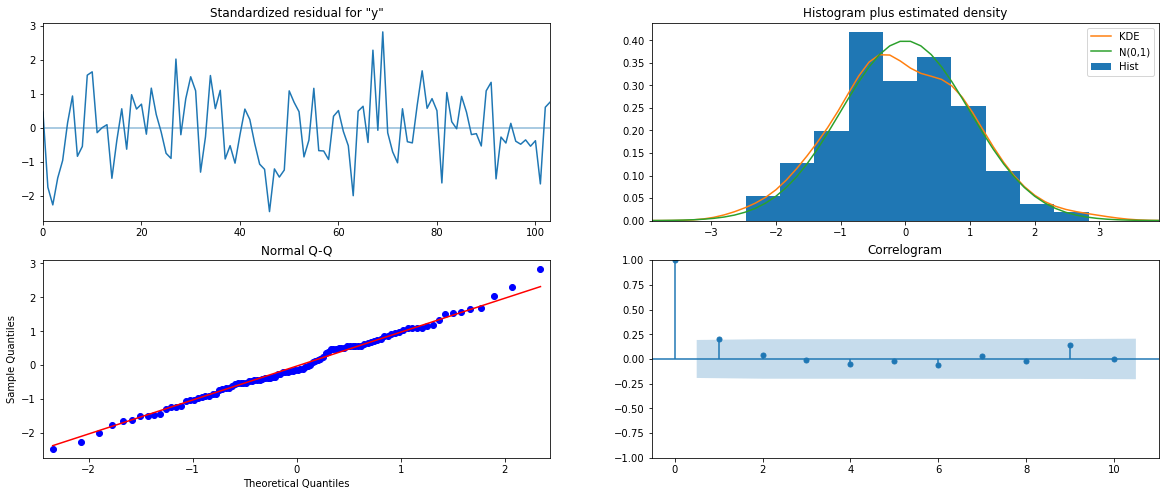

In [254]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

The model diagnostics plot does not indicate any remaining information that we can get.

In [255]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [256]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.414988,15.780562,31.485655,93.344321
1,74.736200,15.850323,43.670139,105.802261
2,77.745287,15.902470,46.577019,108.913556
3,77.062999,15.941402,45.818425,108.307572
4,73.915366,15.970390,42.613977,105.216755


In [257]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

27.258848537849982


In [258]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,1)",17.139193
"SARIMA(1,1,2)(2,0,2,12)",27.258849


### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Lets look at the AFC and PACF plots -

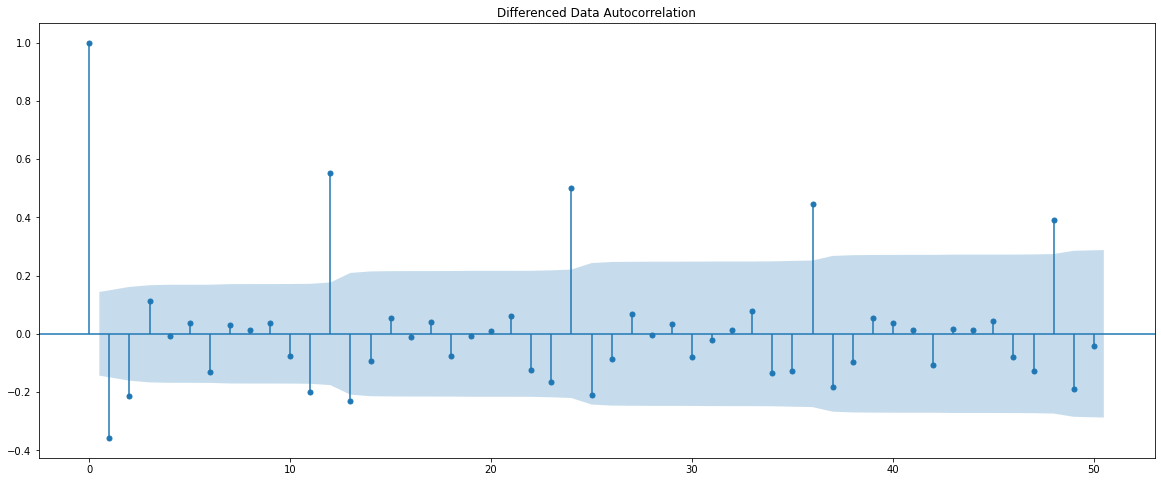

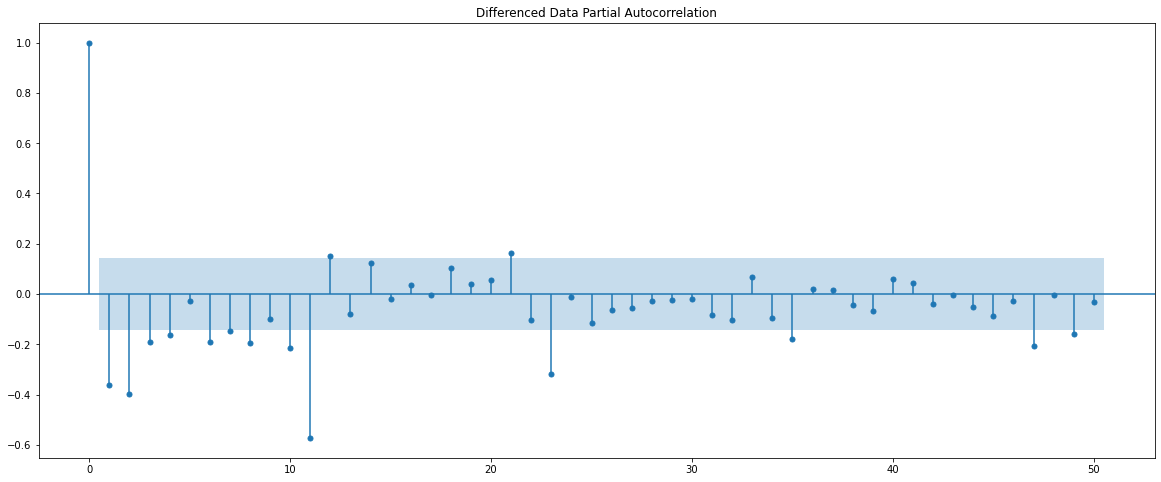

In [260]:
plot_acf(df_2['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_2['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [261]:
manual_ARIMA = ARIMA(train['Rose'].astype('float64'), order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.08074D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   0.000D+00   5.081D+00
  F =   5.0807353370560211     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 0

/Users/damini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


In [262]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [263]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

82.74988534974628


In [264]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,1)",17.139193
"SARIMA(1,1,2)(2,0,2,12)",27.258849
"ARIMA(0,1,0)",82.749885


##### Build a version of the SARIMA model for which the best parameters

Let us look at the ACF and the PACF plots once more.

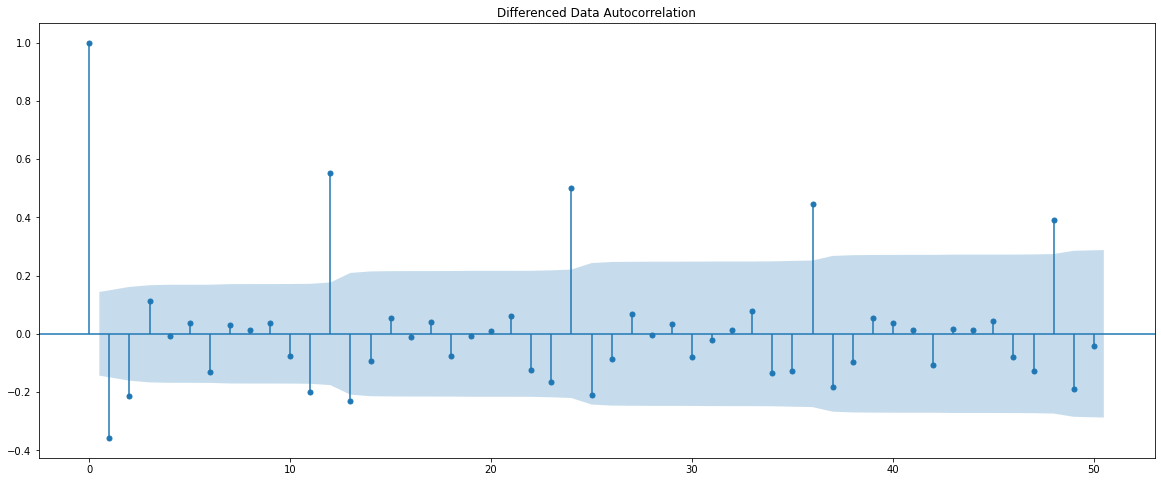

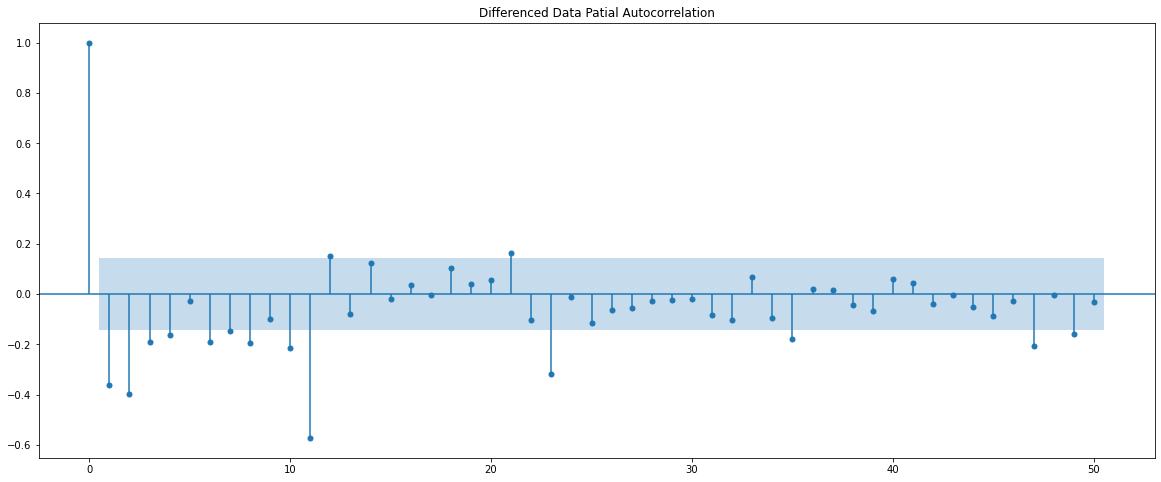

In [266]:
plot_acf(df_2['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_2['Rose'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

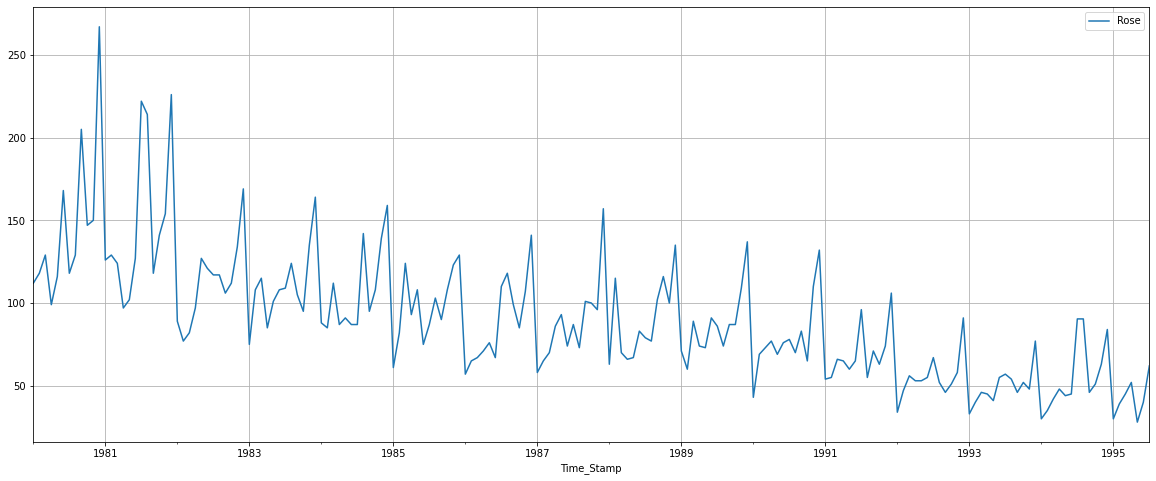

In [267]:
df_2.plot()
plt.grid();

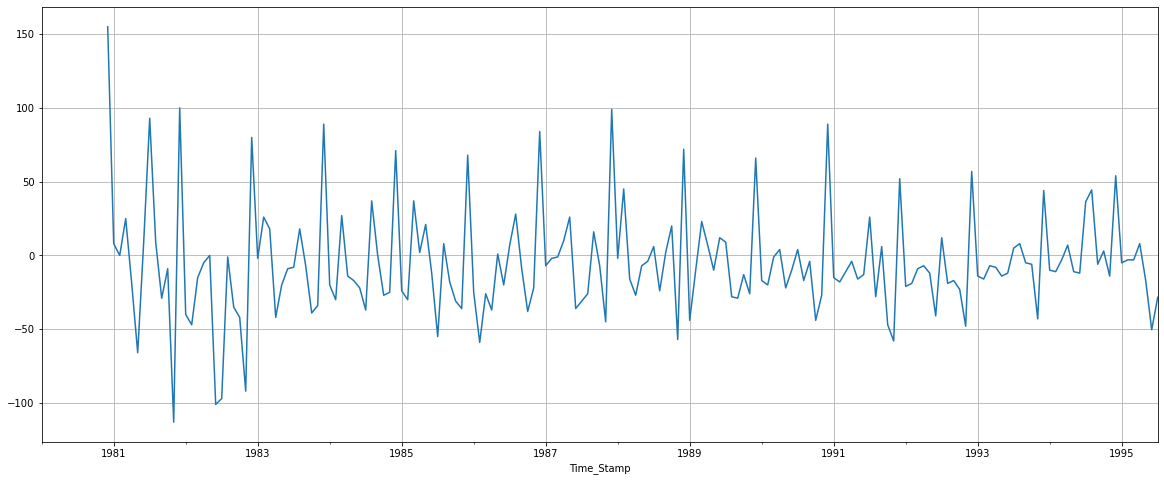

In [269]:
(df_2['Rose'].diff(11)).plot()
plt.grid();

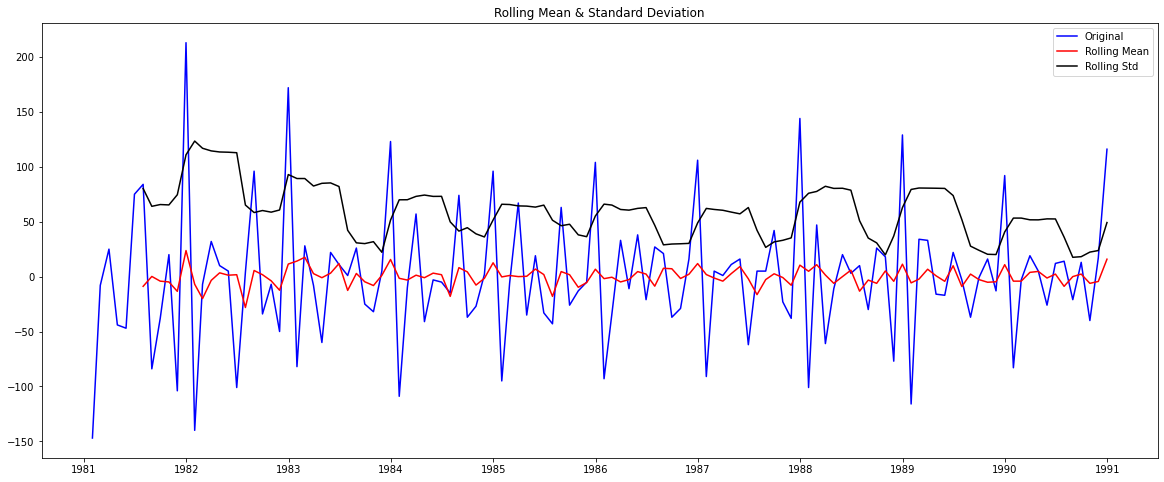

Results of Dickey-Fuller Test:
Test Statistic                  -4.720586
p-value                          0.000077
#Lags Used                      12.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [270]:
test_stationarity((train['Rose'].diff(11).dropna()).diff(1).dropna())

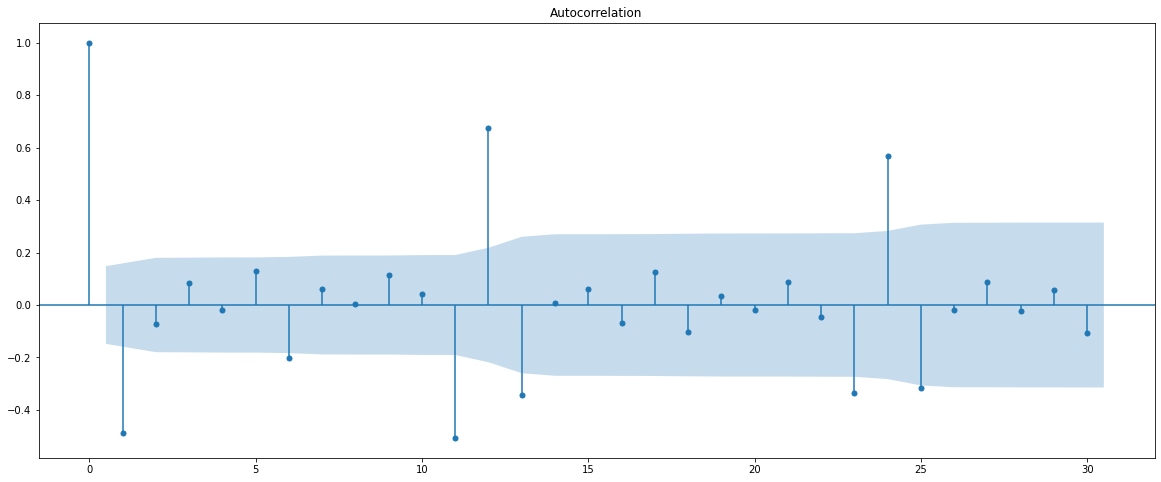

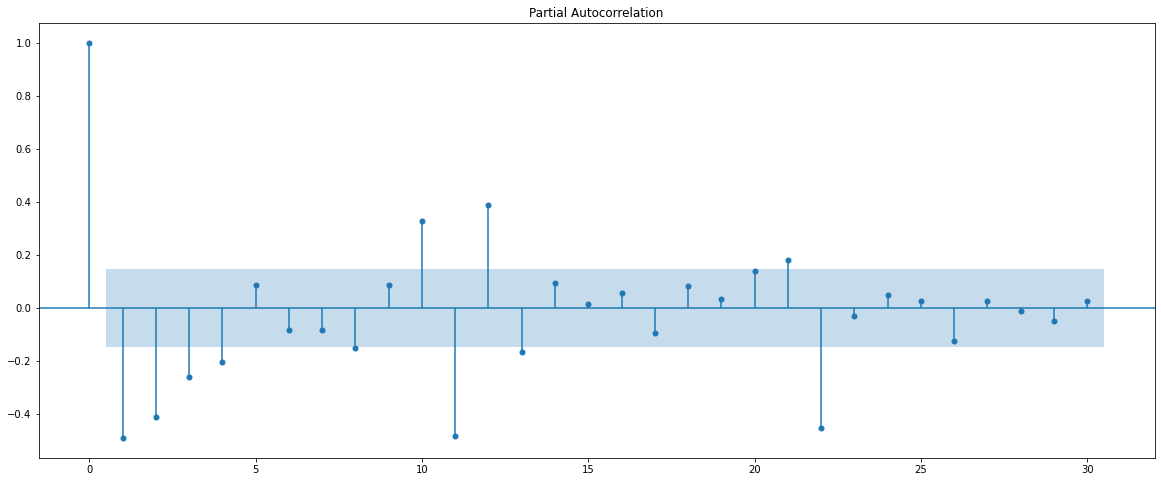

In [271]:
plot_acf((df_2['Rose'].diff(11).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df_2['Rose'].diff(11).dropna()).diff(1).dropna(),lags=30);

In [274]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64448D+00    |proj g|=  1.30112D-01

At iterate    5    f=  3.62510D+00    |proj g|=  1.12158D-02


 This problem is unconstrained.



At iterate   10    f=  3.62506D+00    |proj g|=  4.99357D-03

At iterate   15    f=  3.62470D+00    |proj g|=  2.87169D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     20      1     0     0   1.520D-05   3.625D+00
  F =   3.6246883622902355     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                         SARIMAX Results                                         
Dep. Variable:                                         y   No. Observations:                  132
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3], 6)   Log Likelihood                -478.459
Date:

/Users/damini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


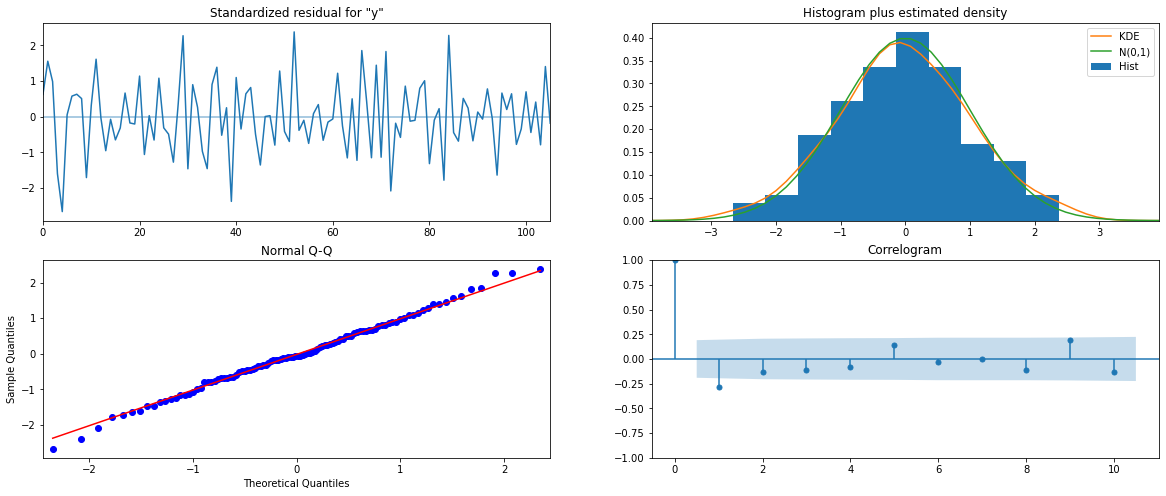

In [275]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

In [276]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [277]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,65.934116,21.599921,23.599049,108.269184
1,83.524407,30.540960,23.665226,143.383589
2,84.347310,37.402458,11.039839,157.654780
3,82.355794,43.187238,-2.289637,167.001225
4,81.764592,48.283860,-12.870035,176.399219


In [278]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

37.27834520730812


In [279]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,0)(1,1,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,1,1)",17.139193
"SARIMA(1,1,2)(2,0,2,12)",27.258849
"ARIMA(0,1,0)",82.749885
"SARIMA(0,1,0)(1,1,3,6)",37.278345


### 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [281]:
resultsDf1 = pd.concat([resultsDf,resultsDf_5])
resultsDf1

,RMSE,Test RMSE
"ARIMA(2,1,1)",17.139193,NaN
"SARIMA(1,1,2)(2,0,2,12)",27.258849,NaN
"ARIMA(0,1,0)",82.749885,NaN
"SARIMA(0,1,0)(1,1,3,6)",37.278345,NaN
"Alpha=0.995,SimpleExponentialSmoothing",NaN,35.936212


In [282]:
resultsDf2 =pd.concat([resultsDf1,resultsDf_4,resultsDf_3,resultsDf_2])
resultsDf2

,RMSE,Test RMSE
"ARIMA(2,1,1)",17.139193,NaN
"SARIMA(1,1,2)(2,0,2,12)",27.258849,NaN
"ARIMA(0,1,0)",82.749885,NaN
"SARIMA(0,1,0)(1,1,3,6)",37.278345,NaN
"Alpha=0.995,SimpleExponentialSmoothing",NaN,35.936212
2pointTrailingMovingAverage,NaN,12.298291
4pointTrailingMovingAverage,NaN,15.845558
6pointTrailingMovingAverage,NaN,15.986163
9pointTrailingMovingAverage,NaN,16.500823
SimpleAverageModel,NaN,52.318735


### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [284]:
full_data_model = sm.tsa.statespace.SARIMAX(df_2['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

/Users/damini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/damini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.13029D+00    |proj g|=  6.76829D-02

At iterate    5    f=  4.11769D+00    |proj g|=  2.95224D-02

At iterate   10    f=  4.11203D+00    |proj g|=  7.92725D-02

At iterate   15    f=  4.04491D+00    |proj g|=  1.63094D-01

At iterate   20    f=  3.96927D+00    |proj g|=  1.05183D-01

At iterate   25    f=  3.95195D+00    |proj g|=  1.08385D-01

At iterate   30    f=  3.94617D+00    |proj g|=  1.45141D-03

At iterate   35    f=  3.94616D+00    |proj g|=  2.89055D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


/Users/damini/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


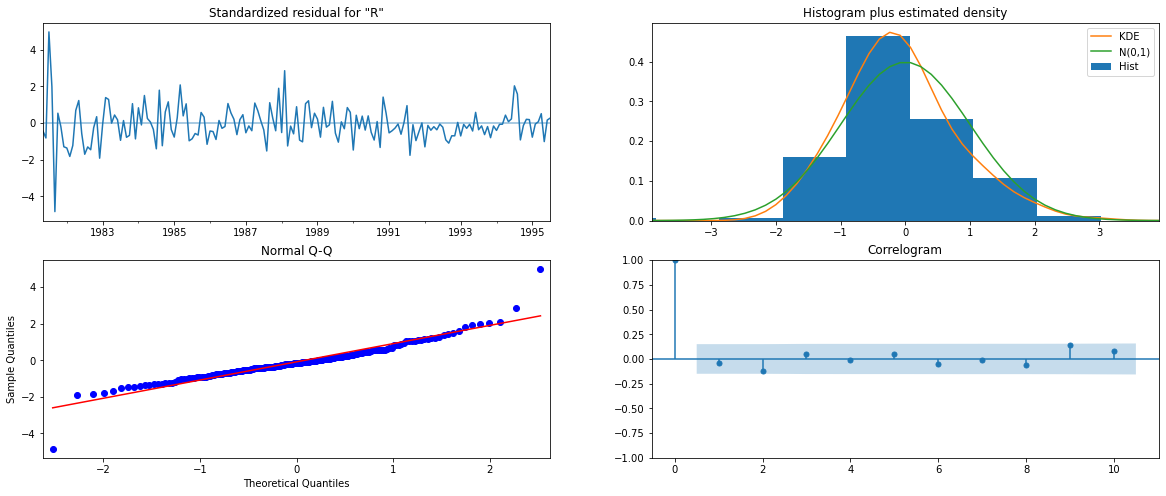

In [285]:
results_full_data_model.plot_diagnostics();

In [297]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [298]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-31,57.238422,17.321413,23.289076,91.187769
1995-09-30,51.187233,18.074924,15.761033,86.613433
1995-10-31,54.380010,18.121107,18.863294,89.896726
1995-11-30,55.774337,18.167172,20.167335,91.381340
1995-12-31,74.515984,18.213121,38.818924,110.213045


In [299]:
rmse = mean_squared_error(df_2['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 28.292466928694978


In [290]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='2015-08-31',end='2016-12-31', freq='M'))

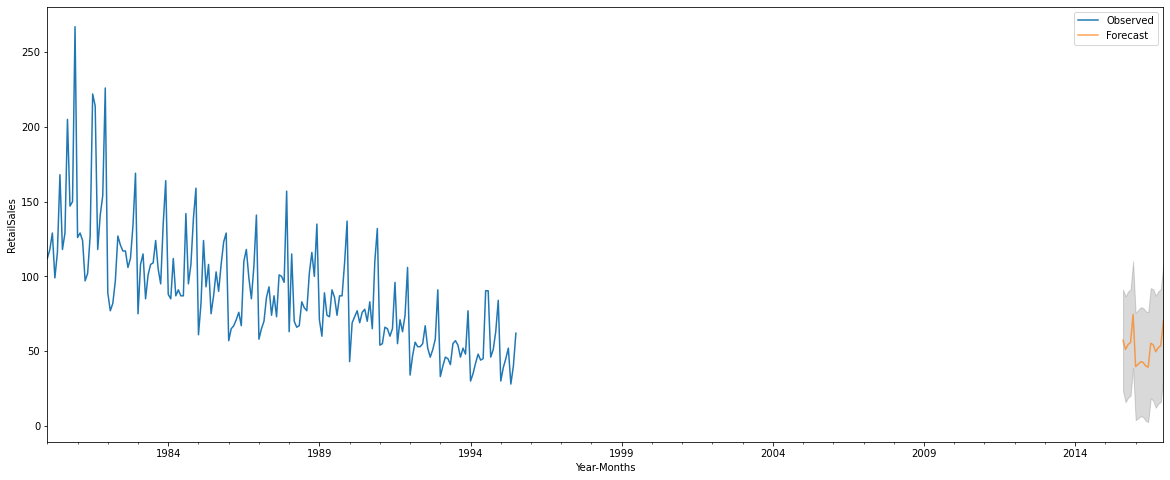

In [292]:
# plot the forecast along with the confidence band

axis = df_2['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

In [293]:
opt_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,6)'])


resultsDf3 = pd.concat([resultsDf2,opt_resultsDf])

resultsDf3

,RMSE,Test RMSE
"ARIMA(2,1,1)",17.139193,NaN
"SARIMA(1,1,2)(2,0,2,12)",27.258849,NaN
"ARIMA(0,1,0)",82.749885,NaN
"SARIMA(0,1,0)(1,1,3,6)",37.278345,NaN
"Alpha=0.995,SimpleExponentialSmoothing",NaN,35.936212
2pointTrailingMovingAverage,NaN,12.298291
4pointTrailingMovingAverage,NaN,15.845558
6pointTrailingMovingAverage,NaN,15.986163
9pointTrailingMovingAverage,NaN,16.500823
SimpleAverageModel,NaN,52.318735


In [294]:
resultsDf3

,RMSE,Test RMSE
"ARIMA(2,1,1)",17.139193,NaN
"SARIMA(1,1,2)(2,0,2,12)",27.258849,NaN
"ARIMA(0,1,0)",82.749885,NaN
"SARIMA(0,1,0)(1,1,3,6)",37.278345,NaN
"Alpha=0.995,SimpleExponentialSmoothing",NaN,35.936212
2pointTrailingMovingAverage,NaN,12.298291
4pointTrailingMovingAverage,NaN,15.845558
6pointTrailingMovingAverage,NaN,15.986163
9pointTrailingMovingAverage,NaN,16.500823
SimpleAverageModel,NaN,52.318735


END